In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


In [2]:
data = pd.read_csv("/kaggle/input/laptop-price/laptop_price.csv", encoding= 'unicode_escape')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The dataset used for this notebook is the "Laptop Price" dataset on Kaggle, 
which can be found at the following link 
https://www.kaggle.com/muhammetvarl/laptop-pricehttps://www.kaggle.com/muhammetvarl/laptop-price.

At the above link, there is also a description of the variables, which will be repeated below.

1 Company- String -Laptop Manufacturer

2 Product -String -Brand and Model

3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)

4 Inches -Numeric- Screen Size

5 ScreenResolution -String- Screen Resolution

6 Cpu- String -Central Processing Unit (CPU)

7 Ram -String- Laptop RAM

8 Memory -String- Hard Disk / SSD Memory

9 GPU -String- Graphics Processing Units (GPU)

10 OpSys -String- Operating System

11 Weight -String- Laptop Weight

12 Price_euros -Numeric- Price (Euro)

## **Goal**:  Predict the price of a laptop from the other variables.

Note that this is a regression problem, where the target variable is Price_euros.

# Hypothesis Generation

Here we will try to generate some hypotheses about what could affect the price of a laptop.

1. Laptops made by well-known companies like Apple and Microsoft might be more expensive.

2. Laptops with a bigger screen size might be more expensive.

3. Laptops with a high screen resolution might be more expensive.

4. Laptops with a high CPU might be more expensive.

5. Laptops with a higher RAM might be more expensive.

6. Laptops with a large memory might be more expensive.

7. Laptops with a high GPU might be more expensive.

8. Laptops without an operating sysytem might be cheaper.

9. Lighter Laptops might be more expensive than heavier laptops
   because they could be newer with more advanced technology.

In [3]:
# Here we will import the required packages.

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Quick Analysis

In [4]:
data.shape

(1303, 13)

In [5]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [6]:
# First, we will check if there are any duplicate laptop Id's.

idsUnique = len(set(data['laptop_ID']))
idsTotal = data.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [7]:
# Since there are no duplicates, we will drop the laptop_ID column.

data.drop(['laptop_ID'], axis=1, inplace=True)

In [8]:
data.shape

(1303, 12)

In [9]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Step 2: Split the data into training and test sets.

In [10]:
# We will put 80% of the data in the training set and the remaining 20% in the test set.

train, test = train_test_split(data, train_size=0.8, random_state=0)

In [11]:
print("Shape of training set:", train.shape)
print("Shape of test set:", test.shape)

Shape of training set: (1042, 12)
Shape of test set: (261, 12)


In [12]:
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
1186,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg,1179.0
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,344.0
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.0
491,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0


In [13]:
test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.00
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2968.00
761,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00
686,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2397.00


# Step 3: Data Exploration

In [14]:
train.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
1186,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg,1179.0
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,344.0
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.0
491,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0
299,Asus,ZenBook UX530UQ-PRO,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg,1468.0
268,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,1018.0
1113,HP,Spectre Pro,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.16kg,1969.0
982,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.0
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0


In [15]:
train.tail(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
600,HP,EliteBook 850,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,1219.00
1094,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,1599.00
599,Dell,Precision 3520,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.06kg,1763.00
277,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,745.00
1033,HP,Probook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.95kg,1195.00
763,Asus,Zenbook UX330UA-AH5Q,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.2kg,1129.00
835,Dell,Alienware 15,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.21kg,2774.63
1216,Acer,E5 774G,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,598.00
559,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,617.90
684,Lenovo,Yoga 730,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19kg,1499.00


In [16]:
test.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.00
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2968.00
761,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00
686,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2397.00
481,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.18kg,586.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
317,Lenovo,ThinkPad 13,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,459.90
402,Lenovo,ThinkPad E580,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.1kg,1144.50
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.6kg,2999.00


In [17]:
test.tail(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
49,Asus,X751NV-TY001T (N4200/4GB/1TB/GeForce,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.8kg,466.0
567,Fujitsu,Lifebook A557,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.2kg,739.0
269,Lenovo,V330-15IKB (i7-8550U/8GB/256GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05kg,880.0
1089,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
974,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,2049.9
1176,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0
549,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.99kg,1729.0
922,HP,Envy 13-AB077cl,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.39kg,1149.0
399,Lenovo,Thinkpad X1,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.13kg,2625.0
44,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,999.0


In [18]:
train.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [19]:
test.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 1249 to 684
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1042 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight            1042 non-null   object 
 11  Price_euros       1042 non-null   float64
dtypes: float64(2), object(10)
memory usage: 105.8+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 580 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight            261 non-null    object 
 11  Price_euros       261 non-null    float64
dtypes: float64(2), object(10)
memory usage: 26.5+ KB


In [22]:
train.describe()

,Inches,Price_euros
count,1042.000000,1042.000000
mean,15.016219,1096.098772
std,1.418932,678.035165
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,949.000000
75%,15.600000,1449.000000
max,18.400000,6099.000000


In [23]:
test.describe()

,Inches,Price_euros
count,261.000000,261.000000
mean,15.021073,1233.828467
std,1.458126,768.702635
min,11.300000,199.000000
25%,14.000000,668.480000
50%,15.600000,1116.020000
75%,15.600000,1598.000000
max,17.300000,5499.000000


Let us look at some descriptive statistics for the remaining categorical variables.


In [24]:
train.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042
unique,19,523,6,40,104,9,37,103,9,169
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,239,26,589,411,154,495,339,222,852,98


In [25]:
test.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,261,261,261,261,261,261,261,261,261,261
unique,16,193,6,24,59,8,23,59,8,104
top,Lenovo,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,63,8,138,96,36,124,73,59,220,23


After looking at the descriptive statistics for Weight, 
it seems Weight should be a numeric variable instead.
First, we need to check if each value of weight is 
of the form "some value"kg.

In [26]:
train['Weight'].str.endswith('kg').sum()

1042

In [27]:
test['Weight'].str.endswith('kg').sum()

261

Thus, each value of weight is of the form "some value"kg.

In [28]:
train.rename(columns={'Weight': 'Weight (kg)'}, inplace=True)
train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
1186,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg,1179.0
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,344.0
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.0
491,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0


In [29]:
train['Weight (kg)'] = train['Weight (kg)'].str[:-2].astype(float)
train['Weight (kg)']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1249    1.24
1186    2.09
568     2.20
1251    1.86
491     1.05
        ... 
763     1.20
835     3.21
1216    3.30
559     2.18
684     1.19
Name: Weight (kg), Length: 1042, dtype: float64

In [30]:
test.rename(columns={'Weight': 'Weight (kg)'}, inplace=True)
test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.00
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2968.00
761,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00
686,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2397.00


In [31]:
test['Weight (kg)'] = test['Weight (kg)'].str[:-2].astype(float)
test['Weight (kg)']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


580     1.45
1017    2.40
761     1.18
686     1.86
186     2.06
        ... 
1176    2.32
549     1.99
922     1.39
399     1.13
44      2.77
Name: Weight (kg), Length: 261, dtype: float64

In [32]:
train.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight (kg)         float64
Price_euros         float64
dtype: object

In [33]:
test.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight (kg)         float64
Price_euros         float64
dtype: object

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 1249 to 684
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1042 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight (kg)       1042 non-null   float64
 11  Price_euros       1042 non-null   float64
dtypes: float64(3), object(9)
memory usage: 105.8+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 580 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight (kg)       261 non-null    float64
 11  Price_euros       261 non-null    float64
dtypes: float64(3), object(9)
memory usage: 26.5+ KB


In [36]:
train.describe()

,Inches,Weight (kg),Price_euros
count,1042.000000,1042.000000,1042.000000
mean,15.016219,2.036813,1096.098772
std,1.418932,0.656895,678.035165
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,589.000000
50%,15.600000,2.040000,949.000000
75%,15.600000,2.300000,1449.000000
max,18.400000,4.700000,6099.000000


In [37]:
test.describe()

,Inches,Weight (kg),Price_euros
count,261.000000,261.000000,261.000000
mean,15.021073,2.046402,1233.828467
std,1.458126,0.699938,768.702635
min,11.300000,0.910000,199.000000
25%,14.000000,1.480000,668.480000
50%,15.600000,2.090000,1116.020000
75%,15.600000,2.320000,1598.000000
max,17.300000,4.600000,5499.000000


In [38]:
train.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
count,1042,1042,1042,1042,1042,1042,1042,1042,1042
unique,19,523,6,40,104,9,37,103,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10
freq,239,26,589,411,154,495,339,222,852


In [39]:
test.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
count,261,261,261,261,261,261,261,261,261
unique,16,193,6,24,59,8,23,59,8
top,Lenovo,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10
freq,63,8,138,96,36,124,73,59,220


## 3.1 Numerical Variables

First, we will look at the numerical variables.  
We will use the value_counts method to get more information about each variable.
Then we will look at distribution plots of each variable in the training set.

In [40]:
num_feats = train.select_dtypes(include='number').columns.to_list()
num_feats

['Inches', 'Weight (kg)', 'Price_euros']

In [41]:
train['Inches'].value_counts()

15.6    538
14.0    158
13.3    127
17.3    127
12.5     29
11.6     28
13.9      6
13.5      5
12.3      4
12.0      4
15.0      4
15.4      4
10.1      4
13.0      2
18.4      1
14.1      1
Name: Inches, dtype: int64

In [42]:
test['Inches'].value_counts()

15.6    127
14.0     39
17.3     37
13.3     37
12.5     10
11.6      5
12.0      2
17.0      1
12.3      1
13.5      1
11.3      1
Name: Inches, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


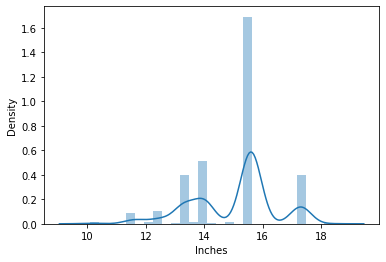

In [43]:
sns.distplot(x=train['Inches'])
plt.xlabel('Inches')
plt.show()

In [44]:
train['Weight (kg)'].value_counts()

2.20    102
2.10     42
2.40     38
2.00     36
2.30     34
       ... 
0.99      1
1.79      1
2.83      1
1.12      1
1.19      1
Name: Weight (kg), Length: 162, dtype: int64

In [45]:
test['Weight (kg)'].value_counts()

2.20    24
2.10    16
2.00     9
1.30     9
1.20     7
        ..
2.09     1
0.97     1
1.21     1
3.58     1
1.39     1
Name: Weight (kg), Length: 101, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


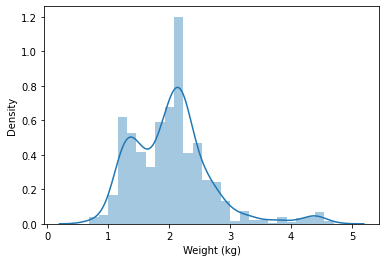

In [46]:
sns.distplot(x=train['Weight (kg)'])
plt.xlabel('Weight (kg)')
plt.show()

In [47]:
train['Price_euros'].value_counts()

1099.00    12
899.00     11
1499.00    10
1799.00     9
999.00      9
           ..
286.00      1
659.01      1
1031.00     1
1825.00     1
617.90      1
Name: Price_euros, Length: 670, dtype: int64

In [48]:
test['Price_euros'].value_counts()

1799.0    5
1499.0    4
1299.0    4
1199.0    4
499.0     3
         ..
1590.0    1
1513.0    1
805.0     1
333.0     1
999.0     1
Name: Price_euros, Length: 223, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


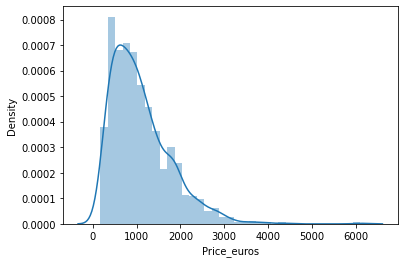

In [49]:
sns.distplot(x=train['Price_euros'])
plt.xlabel('Price_euros')
plt.show()

## 3.2 Categorical Variables

Now, we will look at the categorical variables.

We will use the value_counts method to get more 
information about each variable. 

For categorical variables where the number of unique values is 
small, we will use the groupby and describe methods together to 
get descriptive statistics about the price for each category of the 
categorical variable.  Note that this is only for the training set.

For each categorical variable, we will also check that the set of values 
in the test set is a subset of or equal to the set 
of values in the training set.  This is to make sure 
that we are careful when we create dummy variables later on. 


In [50]:
train['Company'].value_counts()

Dell         239
Lenovo       234
HP           230
Asus         125
Acer          86
MSI           39
Toshiba       36
Apple         14
Samsung        9
Razer          6
Microsoft      5
Mediacom       5
Chuwi          3
Vero           3
Google         2
Xiaomi         2
Huawei         2
Fujitsu        1
LG             1
Name: Company, dtype: int64

In [51]:
test['Company'].value_counts()

Lenovo       63
Dell         58
HP           44
Asus         33
Acer         17
MSI          15
Toshiba      12
Apple         7
Mediacom      2
LG            2
Fujitsu       2
Xiaomi        2
Razer         1
Google        1
Microsoft     1
Vero          1
Name: Company, dtype: int64

In [52]:
train.groupby('Company')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,86.0,626.789651,397.431631,174.00,376.2500,546.500,786.5075,2599.00
Apple,14.0,1727.637857,580.299580,1099.00,1284.2500,1514.275,2114.9775,2858.00
Asus,125.0,1050.660320,705.060062,191.90,470.3400,938.000,1358.0000,3975.00
Chuwi,3.0,314.296667,116.672889,244.99,246.9450,248.900,348.9500,449.00
Dell,239.0,1188.857908,676.180097,274.90,737.4350,979.000,1467.5000,3659.40
Fujitsu,1.0,799.000000,NaN,799.00,799.0000,799.000,799.0000,799.00
Google,2.0,1737.000000,653.366666,1275.00,1506.0000,1737.000,1968.0000,2199.00
HP,230.0,1045.890522,595.517675,209.00,602.9925,959.500,1343.5000,4389.00
Huawei,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.000,1461.5000,1499.00


Note that for the Company variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 19 unique values in the 
training set and 16 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [53]:
set(test['Company']) <= set(train['Company'])

True

In [54]:
train['Product'].value_counts()

XPS 13                                26
Inspiron 3567                         21
250 G6                                17
Vostro 3568                           17
Legion Y520-15IKBN                    16
                                      ..
Tecra X40-D-10H                        1
UX510UX-CN269T (i7-7500U/8GB/256GB     1
Ideapad 700-15ISK                      1
Rog GL702VM-GC017T                     1
Yoga 730                               1
Name: Product, Length: 523, dtype: int64

In [55]:
test['Product'].value_counts()

Inspiron 3567     8
Inspiron 5570     6
XPS 13            4
250 G6            4
ProBook 450       4
                 ..
Yoga 720-13IKB    1
ProBook 440       1
Alienware 15      1
Probook 470       1
Inspiron 7773     1
Name: Product, Length: 193, dtype: int64

Note that for the Product variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 523 unique values in the 
training set and 193 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [56]:
set(test['Product']) <= set(train['Product'])

False

This means that for the Product variable, there are values in the test set 
that are not in the training set.

In [57]:
train['TypeName'].value_counts()

Notebook              589
Ultrabook             157
Gaming                155
2 in 1 Convertible     97
Workstation            24
Netbook                20
Name: TypeName, dtype: int64

In [58]:
test['TypeName'].value_counts()

Notebook              138
Gaming                 50
Ultrabook              39
2 in 1 Convertible     24
Workstation             5
Netbook                 5
Name: TypeName, dtype: int64

In [59]:
train.groupby('TypeName')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
TypeName,,,,,,,,
2 in 1 Convertible,97.0,1250.892784,617.560774,275.0,789.0100,1149.00,1757.42,2824.0
Gaming,155.0,1720.427935,816.191242,699.0,1135.9000,1486.77,2199.00,6099.0
Netbook,20.0,511.040000,470.767648,174.0,260.0000,296.00,494.50,1669.0
Notebook,589.0,762.589083,399.031651,196.0,469.0000,685.00,960.00,2999.0
Ultrabook,157.0,1535.370764,474.907976,499.0,1149.0000,1499.00,1859.00,3100.0
Workstation,24.0,2237.208750,649.809258,1369.0,1859.4925,2028.95,2425.50,4389.0


In [60]:
set(test['TypeName']) == set(train['TypeName'])

True

For the TypeName variable, the set of values in the test set 
is equal to the set of values in the training set.

In [61]:
train['ScreenResolution'].value_counts()

Full HD 1920x1080                                411
1366x768                                         227
IPS Panel Full HD 1920x1080                      175
IPS Panel Full HD / Touchscreen 1920x1080         43
Full HD / Touchscreen 1920x1080                   40
1600x900                                          21
Touchscreen 1366x768                              13
Quad HD+ / Touchscreen 3200x1800                  11
IPS Panel 4K Ultra HD 3840x2160                    9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
4K Ultra HD / Touchscreen 3840x2160                8
IPS Panel 1366x768                                 6
Touchscreen 2560x1440                              5
Touchscreen 2256x1504                              5
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Touchscreen 1920x1200                    4
IPS Panel Retina Display 2880x1800                 4
4K Ultra HD 3840x2160                              4
IPS Panel Retina Display 2560x1600            

In [62]:
test['ScreenResolution'].value_counts()

Full HD 1920x1080                                96
IPS Panel Full HD 1920x1080                      55
1366x768                                         54
IPS Panel Full HD / Touchscreen 1920x1080        10
Full HD / Touchscreen 1920x1080                   7
IPS Panel Quad HD+ / Touchscreen 3200x1800        4
Quad HD+ / Touchscreen 3200x1800                  4
Touchscreen 1366x768                              3
IPS Panel 4K Ultra HD 3840x2160                   3
4K Ultra HD 3840x2160                             3
IPS Panel 2560x1440                               2
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     2
1440x900                                          2
IPS Panel Retina Display 2304x1440                2
4K Ultra HD / Touchscreen 3840x2160               2
IPS Panel Retina Display 2560x1600                2
Touchscreen 2560x1440                             2
1600x900                                          2
Quad HD+ 3200x1800                                1
Touchscreen 

Note that for the ScreenResolution variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 40 unique values in the 
training set and 24 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [63]:
set(test['ScreenResolution']) <= set(train['ScreenResolution'])

True

In [64]:
train['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              154
Intel Core i7 7700HQ 2.8GHz             110
Intel Core i7 7500U 2.7GHz              105
Intel Core i7 8550U 1.8GHz               59
Intel Core i5 8250U 1.6GHz               58
                                       ... 
Intel Core i7 7700HQ 2.7GHz               1
Intel Celeron Dual Core 3855U 1.6GHz      1
Intel Atom X5-Z8350 1.44GHz               1
Intel Atom Z8350 1.92GHz                  1
Intel Core i5 6260U 1.8GHz                1
Name: Cpu, Length: 104, dtype: int64

In [65]:
test['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              36
Intel Core i7 7700HQ 2.8GHz             36
Intel Core i7 7500U 2.7GHz              29
Intel Core i5 8250U 1.6GHz              14
Intel Core i7 8550U 1.8GHz              14
Intel Core i5 6200U 2.3GHz              11
Intel Core i3 6006U 2GHz                11
Intel Core i7 6500U 2.5GHz              10
Intel Core i3 7100U 2.4GHz              10
Intel Core i7 6700HQ 2.6GHz             10
Intel Core i5 6300U 2.4GHz               4
Intel Core i3 7130U 2.7GHz               3
Intel Pentium Quad Core N4200 1.1GHz     3
Intel Celeron Dual Core N3060 1.6GHz     3
Intel Core i3 6006U 2.0GHz               3
Intel Core i7 6820HK 2.7GHz              3
Intel Core i5 6300HQ 2.3GHz              3
Intel Core i7 6600U 2.6GHz               3
Intel Core i7 7820HK 2.9GHz              3
AMD A9-Series 9420 3GHz                  3
Intel Core i7 7600U 2.8GHz               3
Intel Core i7 7660U 2.5GHz               2
Intel Celeron Dual Core N3350 1.1GHz     2
Intel Core 

Note that for the Cpu variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 104 unique values in the 
training set and 59 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [66]:
set(test['Cpu']) <= set(train['Cpu'])

False

This means that for the Cpu variable, there are values in the test set 
that are not in the training set.

In [67]:
train['Ram'].value_counts()

8GB     495
4GB     310
16GB    146
6GB      35
12GB     22
2GB      18
32GB     13
24GB      2
64GB      1
Name: Ram, dtype: int64

In [68]:
test['Ram'].value_counts()

8GB     124
4GB      65
16GB     54
6GB       6
2GB       4
32GB      4
12GB      3
24GB      1
Name: Ram, dtype: int64

In [69]:
Ram_values = [
    '2GB',
    '4GB',
    '6GB',
    '8GB',
    '12GB',
    '16GB',
    '24GB',
    '32GB',
    '64GB'
]

In [70]:
train.groupby('Ram')['Price_euros'].describe().reindex(
    labels=Ram_values, 
    axis=0
)

,count,mean,std,min,25%,50%,75%,max
Ram,,,,,,,,
2GB,18.0,255.463889,59.488525,174.00,214.00,242.00,278.0,379.0
4GB,310.0,575.286839,284.604370,196.00,369.00,489.95,697.0,1799.0
6GB,35.0,614.384857,126.742635,409.00,544.00,579.00,677.0,949.0
8GB,495.0,1168.466384,460.147113,329.00,840.00,1094.00,1427.0,3100.0
12GB,22.0,1287.680000,478.688672,609.00,911.50,1299.00,1692.5,2299.0
16GB,146.0,1907.834932,594.074063,859.01,1453.75,1860.00,2299.0,4389.0
24GB,2.0,2675.000000,414.364574,2382.00,2528.50,2675.00,2821.5,2968.0
32GB,13.0,3315.804615,928.044380,2639.00,2799.00,3072.89,3588.8,6099.0
64GB,1.0,3975.000000,NaN,3975.00,3975.00,3975.00,3975.0,3975.0


Note that as the Ram increases, the average price of 
a laptop increases.

Note that for the Ram variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 9 unique values in the 
training set and 8 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [71]:
set(test['Ram']) <= set(train['Ram'])

True

In [72]:
train['Memory'].value_counts()

256GB SSD                        339
1TB HDD                          187
500GB HDD                        106
512GB SSD                         84
128GB SSD +  1TB HDD              74
128GB SSD                         56
256GB SSD +  1TB HDD              50
32GB Flash Storage                34
2TB HDD                           15
64GB Flash Storage                14
512GB SSD +  1TB HDD              12
1TB SSD                           11
1.0TB Hybrid                       7
256GB Flash Storage                6
16GB Flash Storage                 6
256GB SSD +  2TB HDD               6
32GB SSD                           4
16GB SSD                           3
180GB SSD                          3
512GB SSD +  2TB HDD               3
128GB Flash Storage                3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
128GB HDD                          1
256GB SSD +  256GB SSD             1
512GB SSD +  256GB SSD             1
3

In [73]:
test['Memory'].value_counts()

256GB SSD                    73
1TB HDD                      36
512GB SSD                    34
500GB HDD                    26
256GB SSD +  1TB HDD         23
128GB SSD                    20
128GB SSD +  1TB HDD         20
32GB Flash Storage            4
256GB SSD +  2TB HDD          4
1TB SSD                       3
32GB SSD                      2
180GB SSD                     2
1.0TB Hybrid                  2
512GB SSD +  1TB HDD          2
256GB Flash Storage           2
128GB Flash Storage           1
512GB Flash Storage           1
2TB HDD                       1
512GB SSD +  1.0TB Hybrid     1
256GB SSD +  1.0TB Hybrid     1
256GB SSD +  256GB SSD        1
16GB Flash Storage            1
64GB Flash Storage            1
Name: Memory, dtype: int64

Note that for the Memory variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 37 unique values in the 
training set and 23 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [74]:
set(test['Memory']) <= set(train['Memory'])

False

This means that for the Memory variable, there are values in the test set 
that are not in the training set.

In [75]:
train['Gpu'].value_counts()

Intel HD Graphics 620      222
Intel HD Graphics 520      150
Intel UHD Graphics 620      58
Nvidia GeForce GTX 1050     55
Nvidia GeForce 940MX        37
                          ... 
AMD FirePro W6150M           1
Nvidia GeForce 960M          1
AMD R17M-M1-70               1
AMD Radeon R7 M465           1
Intel HD Graphics 540        1
Name: Gpu, Length: 103, dtype: int64

In [76]:
test['Gpu'].value_counts()

Intel HD Graphics 620           59
Intel HD Graphics 520           35
Nvidia GeForce GTX 1050         11
Nvidia GeForce GTX 1060         11
Intel UHD Graphics 620          10
AMD Radeon 530                   9
Nvidia GeForce GTX 1050 Ti       8
Nvidia GeForce GTX 1070          7
Intel HD Graphics 500            6
Nvidia GeForce 930MX             6
Nvidia GeForce 940MX             6
Nvidia GeForce GTX 980M          5
Intel HD Graphics 400            5
Nvidia GeForce MX150             4
Nvidia GeForce GTX 960M          4
AMD Radeon R5 M430               4
AMD Radeon R5                    4
Intel HD Graphics 515            3
Nvidia GeForce 920MX             3
Intel HD Graphics                3
Intel HD Graphics 510            3
Intel HD Graphics 6000           3
Nvidia GeForce 920MX             2
Intel Iris Plus Graphics 640     2
Intel HD Graphics 615            2
AMD Radeon 520                   2
Nvidia GeForce MX130             2
Nvidia Quadro M2200M             2
AMD Radeon RX 550   

Note that for the Gpu variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 103 unique values in the 
training set and 59 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [77]:
set(test['Gpu']) <= set(train['Gpu'])

False

This means that for the Gpu variable, there are values in the test set 
that are not in the training set.

In [78]:
train['OpSys'].value_counts()

Windows 10      852
Linux            56
No OS            53
Windows 7        35
Chrome OS        23
macOS             9
Windows 10 S      7
Mac OS X          5
Android           2
Name: OpSys, dtype: int64

In [79]:
test['OpSys'].value_counts()

Windows 10      220
No OS            13
Windows 7        10
Linux             6
Chrome OS         4
macOS             4
Mac OS X          3
Windows 10 S      1
Name: OpSys, dtype: int64

In [80]:
train.groupby('OpSys')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
OpSys,,,,,,,,
Android,2.0,434.000000,162.634560,319.00,376.5000,434.00,491.5000,549.00
Chrome OS,23.0,495.213043,439.513334,174.00,291.4500,355.00,555.0000,2199.00
Linux,56.0,611.573929,252.433884,224.00,397.6150,564.00,815.9925,1099.00
Mac OS X,5.0,1396.194000,423.938136,1099.00,1163.0000,1279.00,1300.0000,2139.97
No OS,53.0,590.989057,279.491821,252.36,369.0000,519.00,698.0000,1399.95
Windows 10,852.0,1143.240200,675.577772,191.90,648.3175,993.95,1499.0000,6099.00
Windows 10 S,7.0,1213.262857,820.595083,277.99,664.5000,1089.00,1603.9250,2589.00
Windows 7,35.0,1645.315429,684.661887,895.00,1180.9850,1469.00,1897.0000,4389.00
macOS,9.0,1911.773333,592.072277,1158.70,1510.0000,1803.60,2439.9700,2858.00


Note that the average prices of laptops with a 
Windows operating system are pretty similar.  Also,
the average prices of laptops with a Mac operating system 
are similar too.

Note that for the OpSys variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 9 unique values in the 
training set and 8 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [81]:
set(test['OpSys']) <= set(train['OpSys'])

True

## 3.3 Frequency Tables

Now, we will use frequency tables to get more insight 
into some of the categorical variables.

First, we will see how much of each type
of laptop each company produces in both 
the training and test sets.

In [82]:
pd.crosstab(train['Company'], train['TypeName'])

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,7,7,4,65,3,0
Apple,0,0,0,0,14,0
Asus,11,38,4,55,17,0
Chuwi,0,0,0,3,0,0
Dell,26,32,2,130,40,9
Fujitsu,0,0,0,1,0,0
Google,0,0,0,0,2,0
HP,14,9,6,160,30,11
Huawei,0,0,0,0,2,0


In [83]:
pd.crosstab(test['Company'], test['TypeName'])

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,1,1,1,13,1,0
Apple,0,0,0,0,7,0
Asus,2,16,0,12,3,0
Dell,4,8,0,35,9,2
Fujitsu,0,0,0,2,0,0
Google,0,0,0,0,1,0
HP,5,3,3,24,6,3
LG,0,0,0,0,2,0
Lenovo,12,6,1,40,4,0


Next, we will see how much of each 
product is made by each company.

We will begin with the training set.

In [84]:
pd.crosstab(train['Product'], train['Company'])[:50]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
14-am079na (N3710/8GB/2TB/W10),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-AC110nv (i7-6500U/6GB/1TB/Radeon,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
15-AY023na (N3710/8GB/2TB/W10),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-BA015wm (E2-7110/4GB/500GB/W10),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-BS026nv (i5-7200U/8GB/256GB/Radeon,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-BS028nv (i3-6006U/4GB/1TB/Radeon,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-BS078nr (i7-7500U/8GB/1TB/W10),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15-BS103nv (i5-8250U/6GB/256GB/Radeon,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [85]:
pd.crosstab(train['Product'], train['Company'])[50:100]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
Alienware 15,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alienware 17,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire 1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire 3,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire 5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire 7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire A315-31,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire A315-51,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspire A515-51G,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
pd.crosstab(train['Product'], train['Company'])[100:150]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
EliteBook 1040,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
EliteBook 820,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
EliteBook 840,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0
EliteBook 850,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0
EliteBook Folio,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
EliteBook x360,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
Elitebook 1040,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Elitebook 820,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
Elitebook 840,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
pd.crosstab(train['Product'], train['Company'])[150:200]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
GP72VR Leopard,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
GS40 Phantom,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
GS60 Ghost,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
GS63VR 7RF,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
GS63VR 7RG,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
GS70 Stealth,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
GS73VR Stealth,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
GT62VR 6RD,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
GT62VR 7RE,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [88]:
pd.crosstab(train['Product'], train['Company'])[200:250]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
Ideapad 520-15IKBR,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Ideapad 700-15ISK,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Inspiron 3168,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspiron 3179,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspiron 3552,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspiron 3567,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspiron 3576,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspiron 5368,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspiron 5370,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
pd.crosstab(train['Product'], train['Company'])[250:300]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
Latitude E5270,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Latitude E5470,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Latitude E5570,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Latitude E7270,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Latitude E7470,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Legion Y520-15IKBN,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0
Legion Y720-15IKB,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
Lenovo IdeaPad,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Leopard GP72M,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
pd.crosstab(train['Product'], train['Company'])[300:350]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
Precision 3520,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Precision 5520,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Precision 7720,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Precision M5520,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Predator 17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Predator G9-793,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pro P2540UA-AB51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pro P2540UA-XO0192R,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pro P2540UA-XO0198T,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
pd.crosstab(train['Product'], train['Company'])[350:400]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
Satellite Pro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0
SmartBook 130,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
SmartBook 140,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
SmartBook 141,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Smartbook 142,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Spectre 13-V100nv,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Spectre 13-V111dx,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Spectre Pro,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
Spectre X360,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [92]:
pd.crosstab(train['Product'], train['Company'])[400:450]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
ThinkPad T470p,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
ThinkPad T470s,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
ThinkPad T570,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
ThinkPad X1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
ThinkPad X270,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
ThinkPad Yoga,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
Thinkpad 13,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Thinkpad E470,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
Thinkpad E570,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


In [93]:
pd.crosstab(train['Product'], train['Company'])[450:500]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
V330-15IKB (i3-7130U/4GB/128GB/FHD/W10),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
V330-15IKB (i5-8250U/8GB/256GB/FHD/W10),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
VivoBook E12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VivoBook E201NA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VivoBook E403NA,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VivoBook Flip,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VivoBook L402NA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VivoBook Max,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
pd.crosstab(train['Product'], train['Company'])[500:]

Company,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,,,,
Yoga 900S-12ISK,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Yoga 910-13IKB,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
Yoga 920-13IKB,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
Yoga Book,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
ZBook 15,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
ZBook 15u,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
ZBook 17,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
ZBook Studio,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
Zbook 15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


We will continue with the test set.

In [95]:
pd.crosstab(test['Product'], test['Company'])[0:50]

Company,Acer,Apple,Asus,Dell,Fujitsu,Google,HP,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,
110-15ACL (A6-7310/4GB/500GB/W10),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15-AC110nv (i7-6500U/6GB/1TB/Radeon,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15-bs012nv (i7-7500U/8GB/1TB/Radeon,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15-ra044nv (N3060/4GB/500GB/W10),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15-rb013nv (E2-9000e/4GB/500GB/W10),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17-AK091ND (A9-9420/8GB/1TB/W10),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
250 G6,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
255 G6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Alienware 15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
pd.crosstab(test['Product'], test['Company'])[50:100]

Company,Acer,Apple,Asus,Dell,Fujitsu,Google,HP,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,
Gram 15Z975,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
IdeaPad 310-15ISK,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
IdeaPad 320-14IAP,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
IdeaPad 320-15IKB,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
IdeaPad 320-15ISK,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
IdeaPad 320s-14IKB,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
IdeaPad 510-15ISK,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
IdeaPad Y900-17ISK,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
Ideapad 320-15IKBN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
pd.crosstab(test['Product'], test['Company'])[100:150]

Company,Acer,Apple,Asus,Dell,Fujitsu,Google,HP,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,
Portege Z30-C-16P,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Portege Z30-C-16Z,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Portégé Z30-C-16K,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Precision 3520,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Precision 7520,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ProBook 430,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ProBook 440,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
ProBook 450,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
ProBook 650,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [98]:
pd.crosstab(test['Product'], test['Company'])[150:]

Company,Acer,Apple,Asus,Dell,Fujitsu,Google,HP,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Toshiba,Vero,Xiaomi
Product,,,,,,,,,,,,,,,,
Thinkpad T470,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Thinkpad X1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
Thinkpad X270,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
TravelMate B,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
V110-15IAP (N3350/4GB/128GB/No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
V110-15IKB (i5-7200U/4GB/128GB/W10),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
V110-15ISK (3855U/4GB/500GB/W10),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
V110-15ISK (i3-6006U/4GB/1TB/No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
V110-15ISK (i5-6200U/4GB/500GB/No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 3.4 Pivot Tables

Now, we will use pivot tables to get more insight 
into some of the categorical variables.  Note that 
we will only be looking at the training set here.

First, we will see the average price of 
each type of laptop each company produces.

In [99]:
pd.pivot_table(train, values='Price_euros', index='Company', columns='TypeName')

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,744.430000,1497.857143,273.75,528.013846,930.666667,NaN
Apple,NaN,NaN,NaN,NaN,1727.637857,NaN
Asus,981.364545,1733.536579,266.20,602.028000,1205.105882,NaN
Chuwi,NaN,NaN,NaN,314.296667,NaN,NaN
Dell,1116.465769,1950.987813,519.50,876.351308,1467.369750,2113.095556
Fujitsu,NaN,NaN,NaN,799.000000,NaN,NaN
Google,NaN,NaN,NaN,NaN,1737.000000,NaN
HP,1532.170714,1464.666667,910.00,809.499625,1526.378000,2286.468182
Huawei,NaN,NaN,NaN,NaN,1424.000000,NaN


Next, we will see the average price of 
a laptop aggregated over Company and Ram.


In [100]:
pd.pivot_table(
    train, 
    values='Price_euros',
    index='Company', 
    columns='Ram'
).reindex(
    labels=Ram_values, 
    axis=1
)

Ram,2GB,4GB,6GB,8GB,12GB,16GB,24GB,32GB,64GB
Company,,,,,,,,,
Acer,234.333333,430.909111,479.000000,789.241724,676.495000,2033.000000,NaN,NaN,NaN
Apple,NaN,NaN,NaN,1421.154000,NaN,2493.847500,NaN,NaN,NaN
Asus,237.300000,440.373250,608.005000,1052.128261,1111.180000,1768.156000,2968.0,3344.500000,3975.0
Chuwi,NaN,246.945000,449.000000,NaN,NaN,NaN,NaN,NaN,NaN
Dell,379.000000,616.418302,452.333333,1164.011353,1103.690000,1820.285000,NaN,3150.922857,NaN
Fujitsu,NaN,NaN,NaN,799.000000,NaN,NaN,NaN,NaN,NaN
Google,NaN,NaN,NaN,1275.000000,NaN,2199.000000,NaN,NaN,NaN
HP,236.500000,737.936250,622.926000,1233.261130,1637.000000,1958.300000,NaN,NaN,NaN
Huawei,NaN,NaN,NaN,1424.000000,NaN,NaN,NaN,NaN,NaN


Next, we will see the average price of 
a laptop aggregated over Company and 
Operating System.


In [101]:
pd.pivot_table(train, values='Price_euros', index='Company', columns='OpSys')

OpSys,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
Company,,,,,,,,,
Acer,NaN,303.60,524.975000,NaN,NaN,707.805167,NaN,NaN,NaN
Apple,NaN,NaN,NaN,1396.194,NaN,NaN,NaN,NaN,1911.773333
Asus,NaN,478.45,484.897000,NaN,1018.666667,1128.265556,308.995,NaN,NaN
Chuwi,NaN,NaN,NaN,NaN,NaN,314.296667,NaN,NaN,NaN
Dell,NaN,295.00,699.985667,NaN,NaN,1262.812463,NaN,1298.308000,NaN
Fujitsu,NaN,NaN,NaN,NaN,NaN,799.000000,NaN,NaN,NaN
Google,NaN,1737.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,NaN,527.50,NaN,NaN,371.797273,1023.933316,NaN,1771.795789,NaN
Huawei,NaN,NaN,NaN,NaN,NaN,1424.000000,NaN,NaN,NaN


Next, we will see the average price of 
a laptop aggregated over the type of 
laptop and Ram.


In [102]:
pd.pivot_table(
    train, 
    values='Price_euros', 
    index='TypeName', 
    columns='Ram'
).reindex(
    labels=Ram_values, 
    axis=1
)

Ram,2GB,4GB,6GB,8GB,12GB,16GB,24GB,32GB,64GB
TypeName,,,,,,,,,
2 in 1 Convertible,275.0000,681.162800,639.010000,1370.618039,1134.000000,1930.400000,NaN,NaN,NaN
Gaming,NaN,999.000000,NaN,1129.558000,1544.842857,1925.263378,2968.0,3424.314545,3975.0
Netbook,205.7800,471.838462,NaN,1529.000000,NaN,NaN,NaN,NaN,NaN
Notebook,274.5375,539.885581,607.074545,955.241976,893.632500,1461.762500,NaN,2639.000000,NaN
Ultrabook,NaN,1145.113077,831.000000,1442.459732,1943.333333,2029.586538,2382.0,2799.000000,NaN
Workstation,NaN,NaN,NaN,2025.067647,NaN,2752.408571,NaN,NaN,NaN


Next, we will see the average price of 
a laptop aggregated over Operating System 
and the type of laptop.


In [103]:
pd.pivot_table(train, values='Price_euros', index='OpSys', columns='TypeName')

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
OpSys,,,,,,
Android,434.000000,NaN,NaN,NaN,NaN,NaN
Chrome OS,565.400000,NaN,290.9875,345.125000,1737.000000,NaN
Linux,NaN,846.25000,NaN,573.302800,1099.000000,NaN
Mac OS X,NaN,NaN,NaN,NaN,1396.194000,NaN
No OS,NaN,1038.50000,NaN,511.431556,NaN,NaN
Windows 10,1298.777753,1783.03028,595.3900,798.745723,1501.513934,2162.611667
Windows 10 S,NaN,NaN,340.0000,277.990000,1574.970000,NaN
Windows 7,2050.380000,NaN,1599.0000,1269.062000,1677.894167,2461.000000
macOS,NaN,NaN,NaN,NaN,1911.773333,NaN


Next, we will see the average price of 
a laptop aggregated over Operating 
System and Ram.


In [104]:
pd.pivot_table(
    train, 
    values='Price_euros', 
    index='OpSys', 
    columns='Ram'
).reindex(
    labels=Ram_values, 
    axis=1
)

Ram,2GB,4GB,6GB,8GB,12GB,16GB,24GB,32GB,64GB
OpSys,,,,,,,,,
Android,NaN,434.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chrome OS,234.333333,395.170588,NaN,885.000000,NaN,2199.000000,NaN,NaN,NaN
Linux,NaN,419.232000,NaN,816.268696,949.000,974.000000,NaN,NaN,NaN
Mac OS X,NaN,NaN,NaN,1210.250000,NaN,2139.970000,NaN,NaN,NaN
No OS,NaN,390.498400,NaN,710.560400,NaN,1265.316667,NaN,NaN,NaN
Windows 10,259.690000,608.145785,614.384857,1182.703990,1254.048,1889.564848,2675.0,3315.804615,3975.0
Windows 10 S,NaN,673.997500,NaN,1603.925000,NaN,2589.000000,NaN,NaN,NaN
Windows 7,NaN,1122.344444,NaN,1662.360909,2299.000,2871.333333,NaN,NaN,NaN
macOS,NaN,NaN,NaN,1561.756667,NaN,2611.806667,NaN,NaN,NaN


## 3.5 Correlation Matrix

Now, we will look at a correlation matrix between the numeric variables.

<AxesSubplot:>

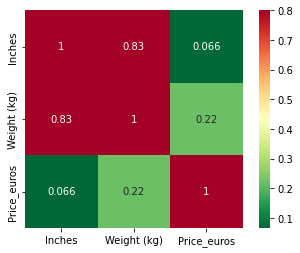

In [105]:
#correlation matrix
corrmat = train.corr()
#f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True,cmap="RdYlGn_r")

There is very little correlation between the target variable 
and the other numeric variables.

# Step 4: Outlier Detection

Here, we will only be working with the training set.  

First, we will look at a univariate box plot of the target variable. 

<AxesSubplot:xlabel='Price_euros'>

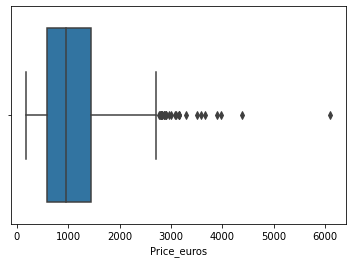

In [106]:
sns.boxplot(x=train['Price_euros'])

There seems to be a big outlier when Price_euros is about 6000.  
Let us look at the outlier in more detail.

In [107]:
train[(train['Price_euros'] > 6000)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0


We will remove the outlier.

In [108]:
train.drop(train[(train['Price_euros'] > 6000)].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
train.shape

(1041, 12)

In [110]:
train.describe()

,Inches,Weight (kg),Price_euros
count,1041.000000,1041.000000,1041.000000
mean,15.014025,2.035417,1091.292911
std,1.417845,0.655662,660.366754
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,589.000000
50%,15.600000,2.040000,949.000000
75%,15.600000,2.300000,1449.000000
max,18.400000,4.700000,4389.000000


In [111]:
train[(train['Price_euros'] > 6000)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros


Now, we will look at the remaining numeric variables.  
For univariate analysis, we will use box plots.  
For mulitvariate analysis, we will use scatter plots.

<AxesSubplot:xlabel='Inches'>

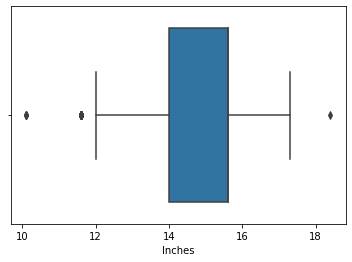

In [112]:
sns.boxplot(x=train['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

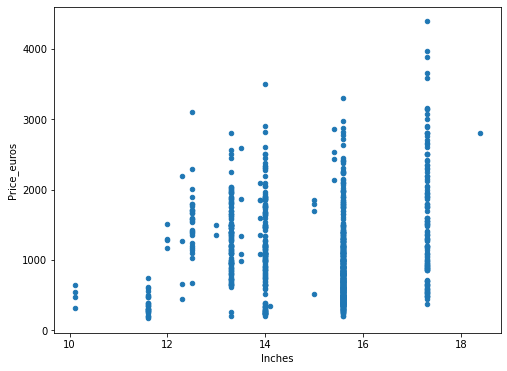

In [113]:
train.plot.scatter(x='Inches', y='Price_euros', figsize=(8,6))

<AxesSubplot:xlabel='Weight (kg)'>

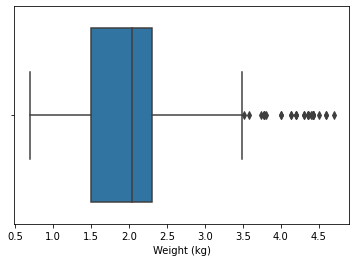

In [114]:
sns.boxplot(x=train['Weight (kg)'])

<AxesSubplot:xlabel='Weight (kg)', ylabel='Price_euros'>

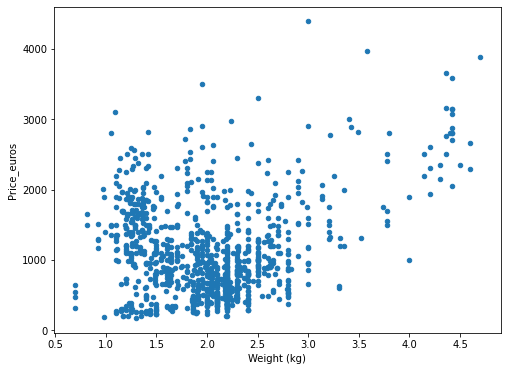

In [115]:
train.plot.scatter(x='Weight (kg)', y='Price_euros', figsize=(8,6))

For the categorical variables, we will use mulitvariate box plots.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

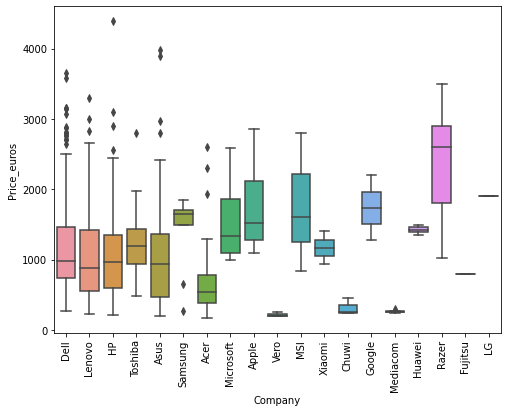

In [116]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

There seems to be a big outlier when the Company is 'HP' 
and Price_euros is greater than 4000.  Let us look at 
the outlier in more detail.

In [117]:
train[(train['Company'] == 'HP') 
      & (train['Price_euros'] > 4000)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
749,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.0,4389.0


We will remove the outlier.

In [118]:
outlier_mask = ((train['Company'] == 'HP') 
                & (train['Price_euros'] > 4000))

In [119]:
train.drop(train[outlier_mask].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [120]:
train.shape

(1040, 12)

In [121]:
train.describe()

,Inches,Weight (kg),Price_euros
count,1040.000000,1040.000000,1040.000000
mean,15.011827,2.034489,1088.122038
std,1.416751,0.655294,652.707614
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,589.000000
50%,15.600000,2.040000,949.000000
75%,15.600000,2.300000,1434.000000
max,18.400000,4.700000,3975.000000


In [122]:
outlier_mask = ((train['Company'] == 'HP') 
                & (train['Price_euros'] > 4000))

In [123]:
train[outlier_mask]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros


In [124]:
products = train['Product'].unique()

In [125]:
len(products)

522

Since there are over 500 values for the Product variable,
we will plot multiple box plots for this variable with 
each box plot containing about 50 categories.

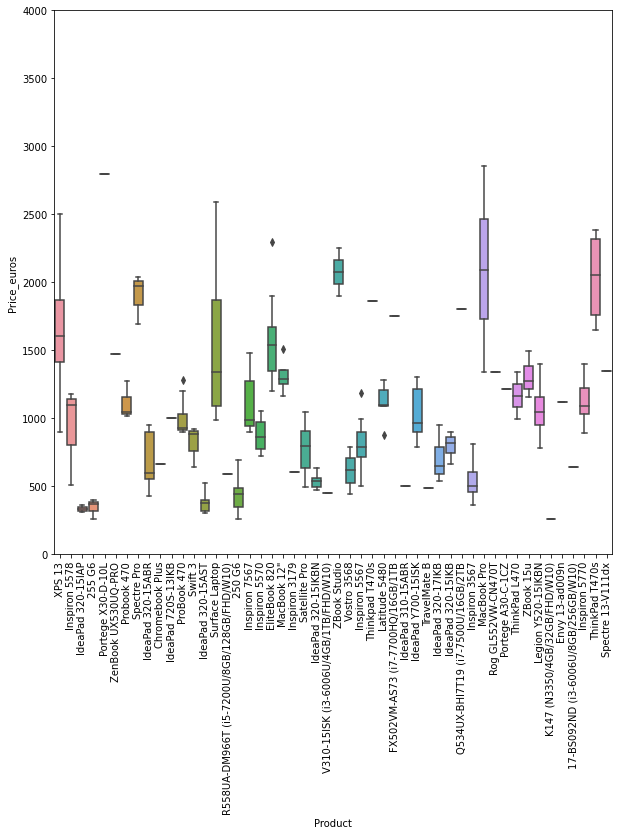

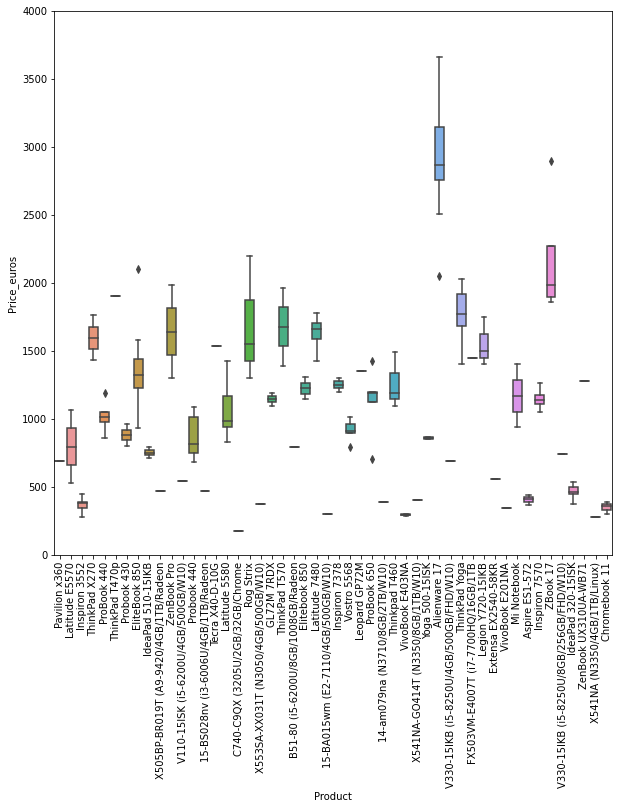

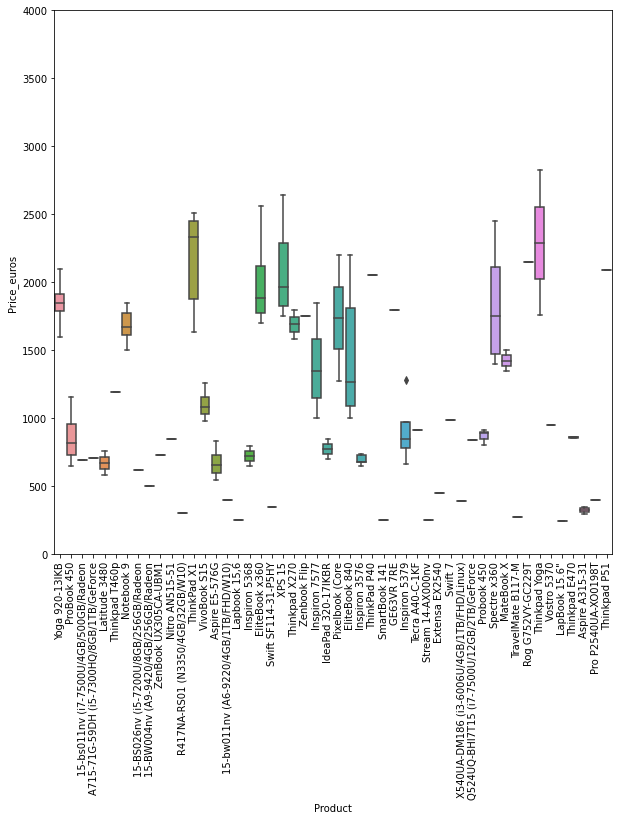

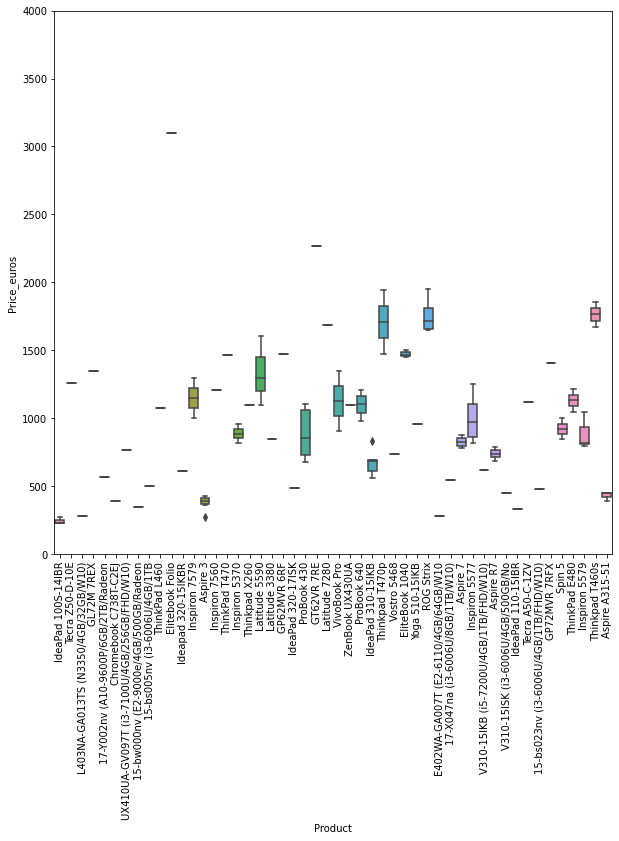

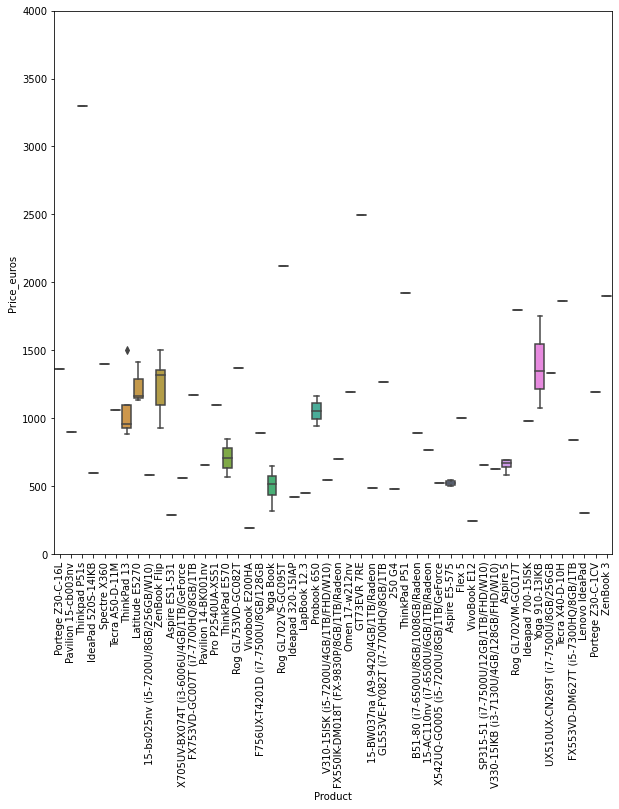

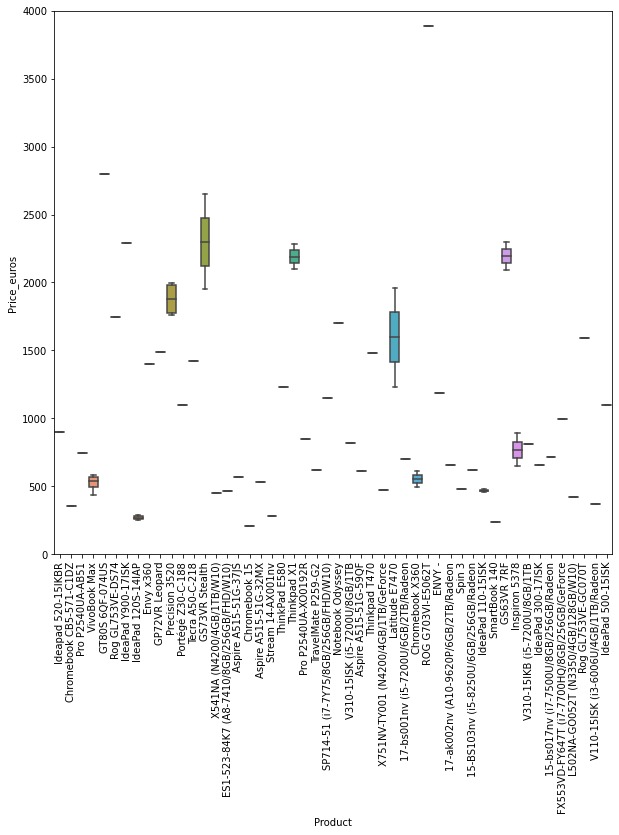

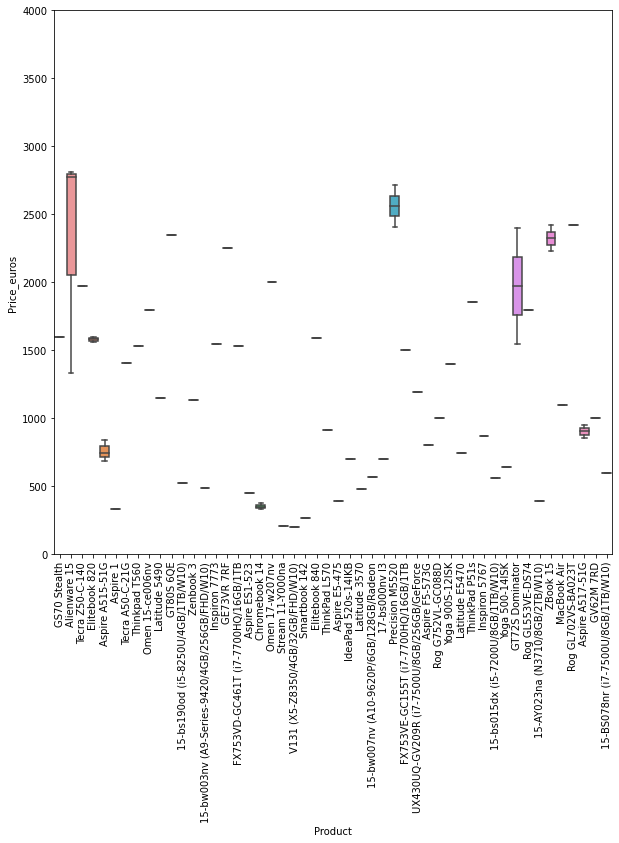

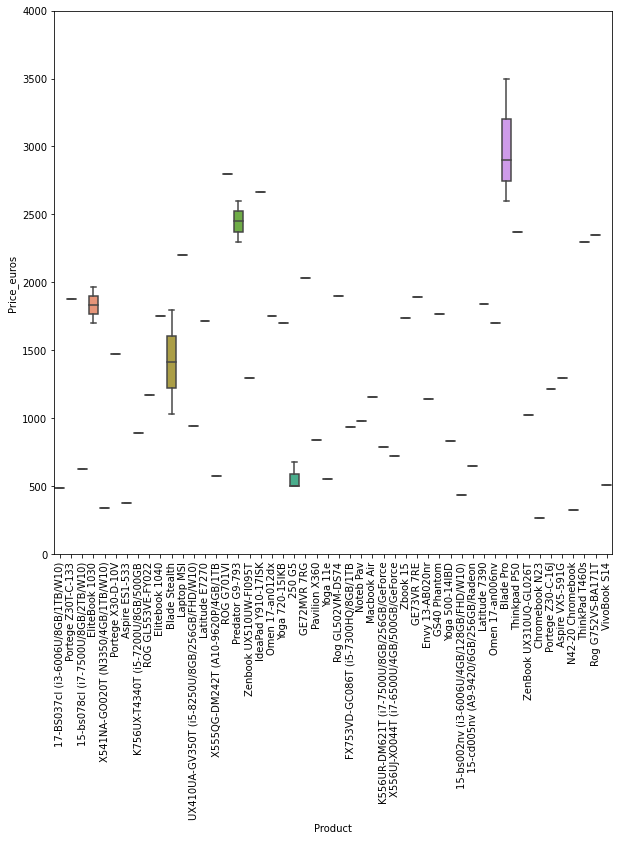

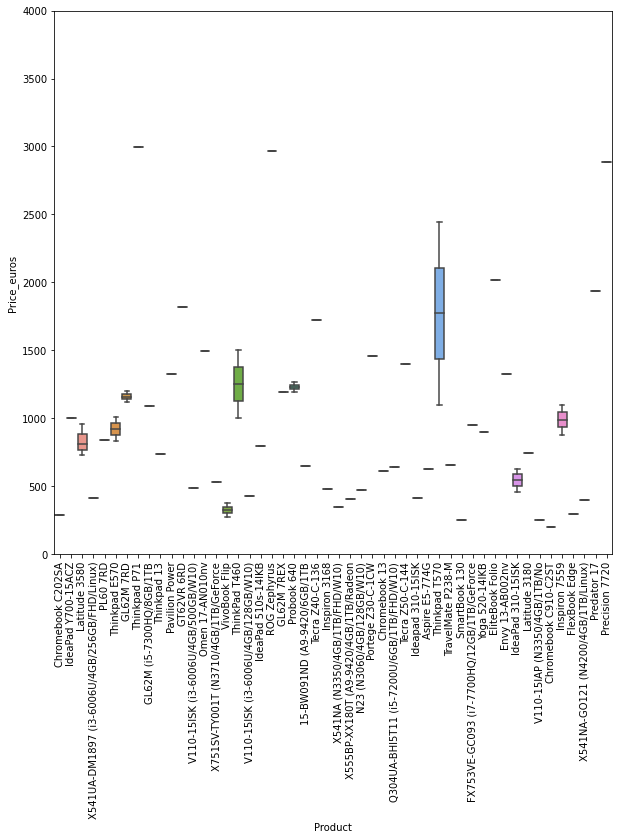

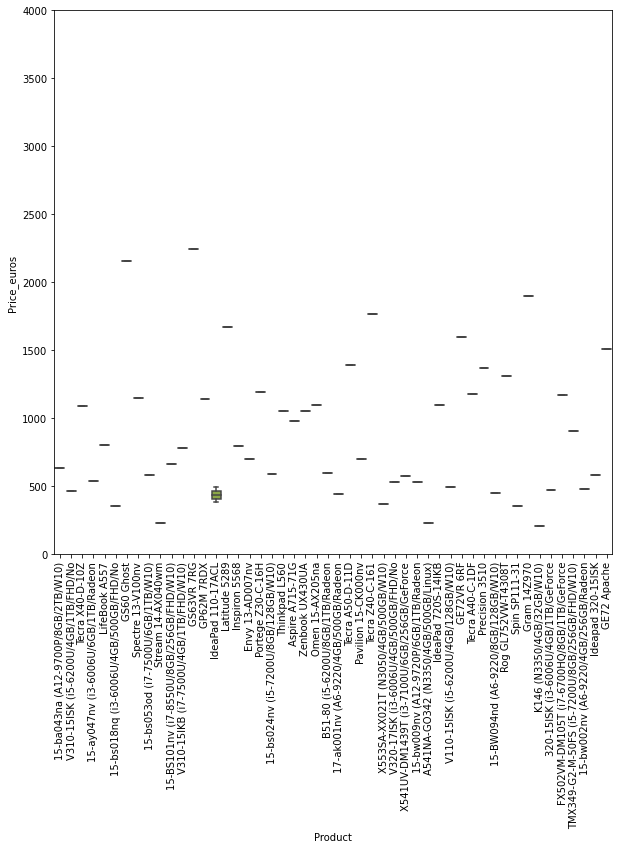

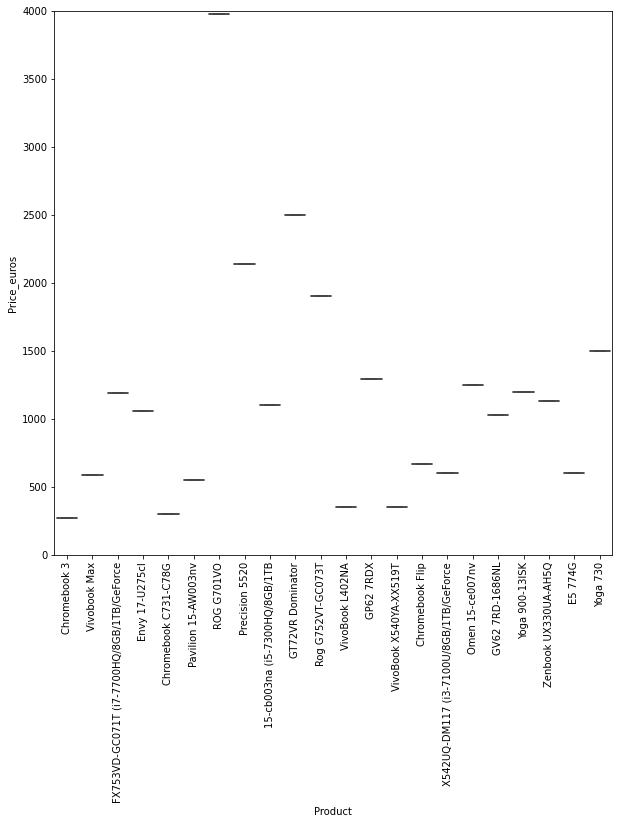

In [126]:
for i in list(range(0,550,50)):
    f, ax = plt.subplots(figsize=(10, 10))
    fig = sns.boxplot(x='Product', y='Price_euros', data=train, order=products[i:(i+50)])
    plt.xticks(rotation=90)
    plt.ylim(0, 4000)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2 in 1 Convertible'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, 'Netbook'),
  Text(5, 0, 'Workstation')])

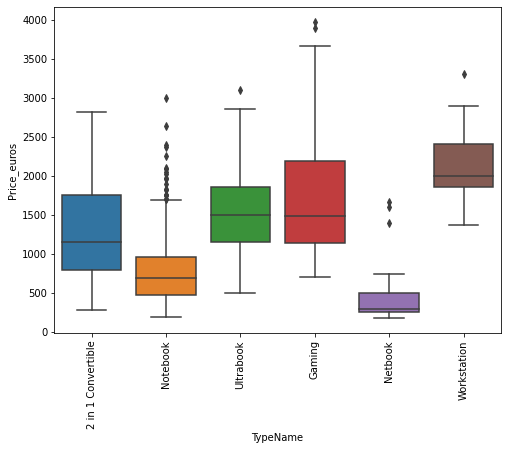

In [127]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TypeName', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Quad HD+ / Touchscreen 3200x1800'),
  Text(1, 0, 'Full HD / Touchscreen 1920x1080'),
  Text(2, 0, 'Full HD 1920x1080'),
  Text(3, 0, '1366x768'),
  Text(4, 0, 'IPS Panel Touchscreen 2400x1600'),
  Text(5, 0, 'IPS Panel Full HD 1920x1080'),
  Text(6, 0, '1600x900'),
  Text(7, 0, 'Touchscreen 2256x1504'),
  Text(8, 0, 'IPS Panel Retina Display 2304x1440'),
  Text(9, 0, 'Quad HD+ 3200x1800'),
  Text(10, 0, 'Touchscreen 1366x768'),
  Text(11, 0, '4K Ultra HD / Touchscreen 3840x2160'),
  Text(12, 0, 'IPS Panel Retina Display 2560x1600'),
  Text(13, 0, '2560x1440'),
  Text(14, 0, 'IPS Panel Full HD / Touchscreen 1920x1080'),
  Text(15, 0, 'IPS Panel 4K Ultra HD 3840x2160'),
  Text(16, 0, 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'),
  Text(17, 0, 'IPS Panel 1366x768'),
  Text(18, 0, 'Touchsc

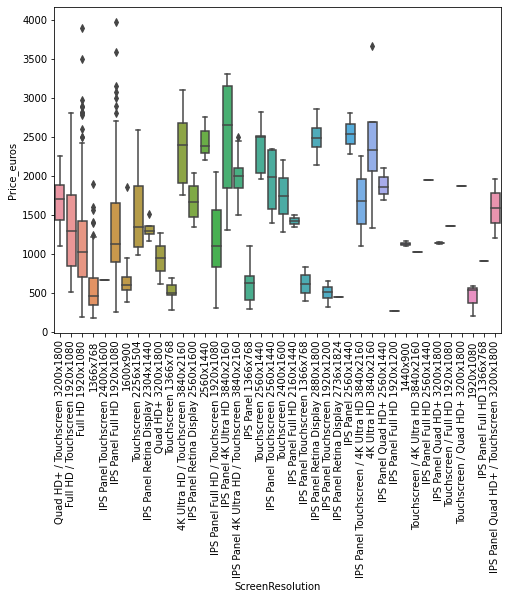

In [128]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='ScreenResolution', y='Price_euros', data=train)
plt.xticks(rotation=90)

In [129]:
cpu_values = train['Cpu'].unique()

In [130]:
len(cpu_values)

103

Since there are over 103 values for the Cpu variable,
we will plot multiple box plots for this variable with 
each box plot containing about 21 categories.

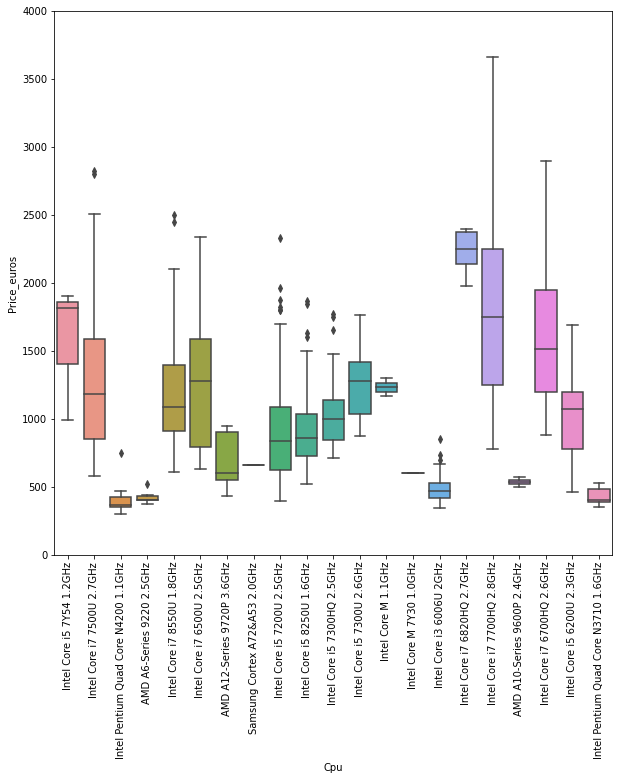

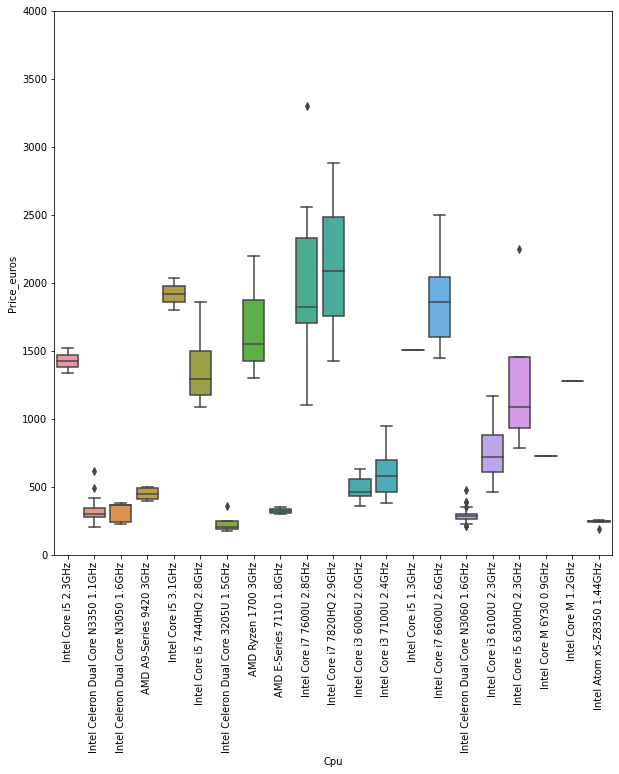

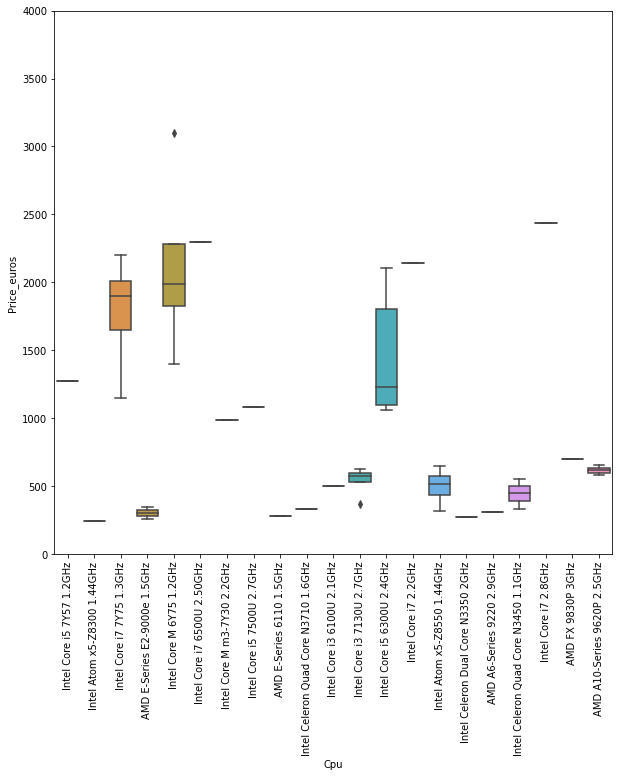

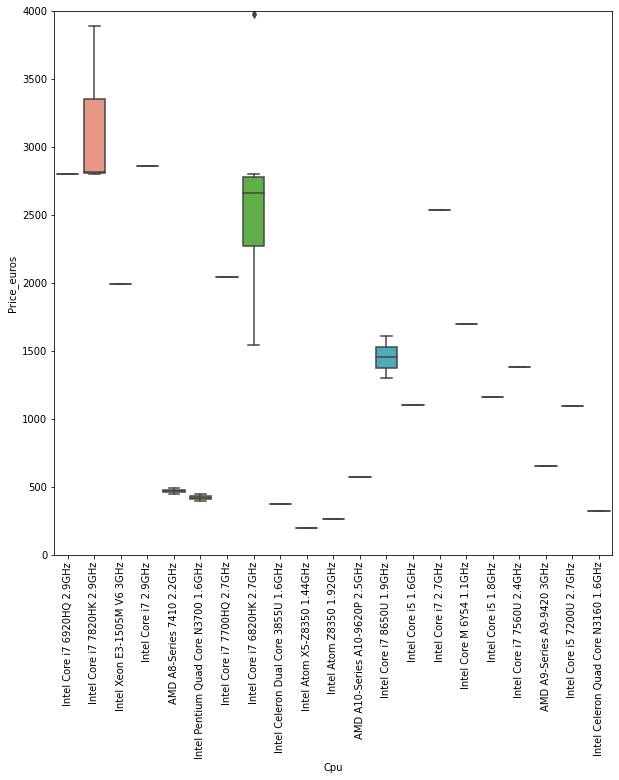

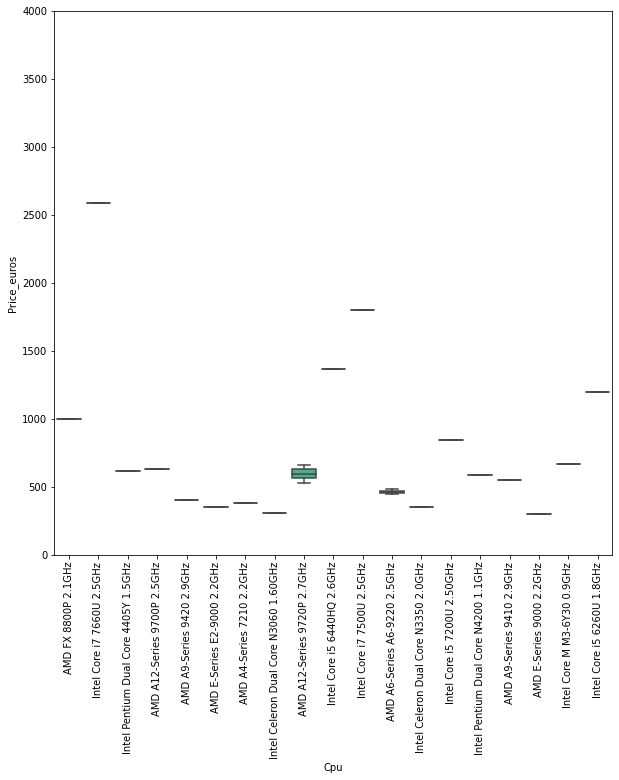

In [131]:
for i in list(range(0,103,21)):
    f, ax = plt.subplots(figsize=(10, 10))
    fig = sns.boxplot(x='Cpu', y='Price_euros', data=train, order=cpu_values[i:(i+21)])
    plt.xticks(rotation=90)
    plt.ylim(0, 4000)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2GB'),
  Text(1, 0, '4GB'),
  Text(2, 0, '6GB'),
  Text(3, 0, '8GB'),
  Text(4, 0, '12GB'),
  Text(5, 0, '16GB'),
  Text(6, 0, '24GB'),
  Text(7, 0, '32GB'),
  Text(8, 0, '64GB')])

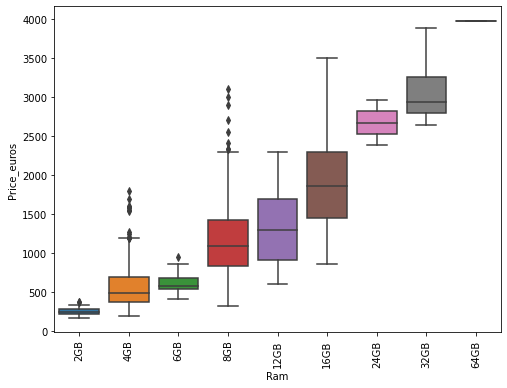

In [132]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Ram', y='Price_euros', data=train, order=Ram_values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '256GB SSD'),
  Text(1, 0, '512GB SSD'),
  Text(2, 0, '500GB HDD'),
  Text(3, 0, '1TB HDD'),
  Text(4, 0, '32GB Flash Storage'),
  Text(5, 0, '128GB SSD'),
  Text(6, 0, '128GB HDD'),
  Text(7, 0, '1.0TB Hybrid'),
  Text(8, 0, '256GB Flash Storage'),
  Text(9, 0, '2TB HDD'),
  Text(10, 0, '8GB SSD'),
  Text(11, 0, '128GB SSD +  1TB HDD'),
  Text(12, 0, '128GB Flash Storage'),
  Text(13, 0, '512GB SSD +  2TB HDD'),
  Text(14, 0, '256GB SSD +  2TB HDD'),
  Text(15, 0, '1TB SSD'),
  Text(16, 0, '32GB SSD'),
  Text(17, 0, '256GB SSD +  1TB HDD'),
  Text(18, 0, '180GB SSD'),
  Text(19, 0, '64GB Flash Storage'),
  Text(20, 0, '512GB Flash Storage'),
  Text(21, 0, '512GB SSD +  1TB HDD'),
  Text(22, 0, '240GB SSD'),
  Text(23, 0, '64GB SSD'),
  Text(24, 0, '1TB HDD +  1TB HDD'),
  Text(25, 0, '1TB SSD +  1TB H

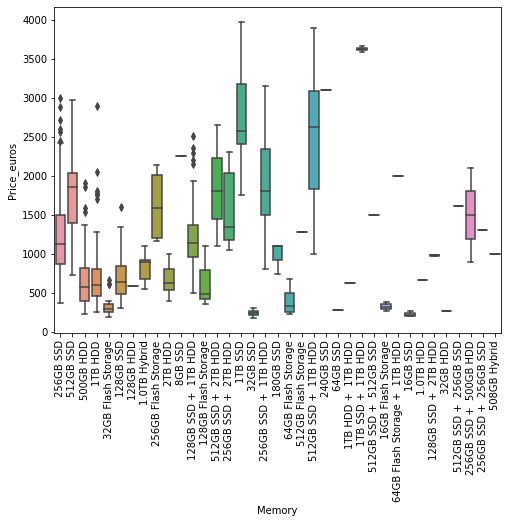

In [133]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Memory', y='Price_euros', data=train)
plt.xticks(rotation=90)

In [134]:
gpu_values = train['Gpu'].unique()

In [135]:
len(gpu_values)

103

Since there are over 103 values for the Gpu variable,
we will plot multiple box plots for this variable with 
each box plot containing about 21 categories.

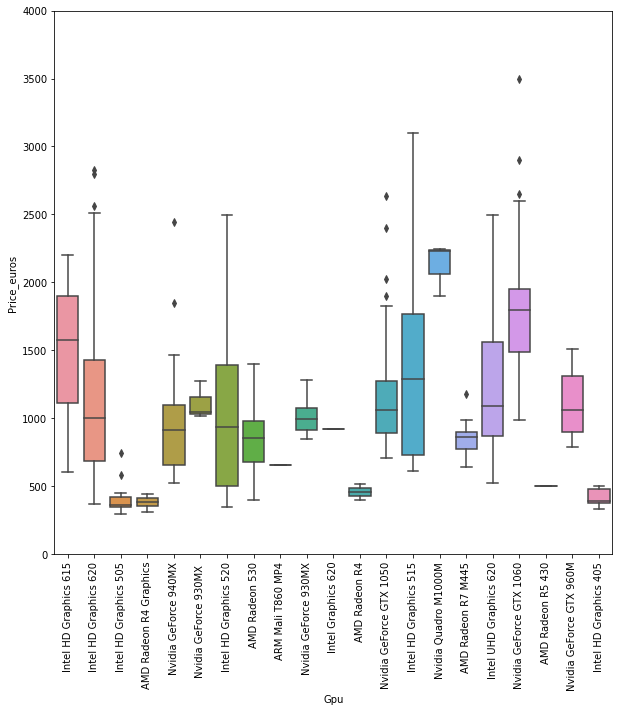

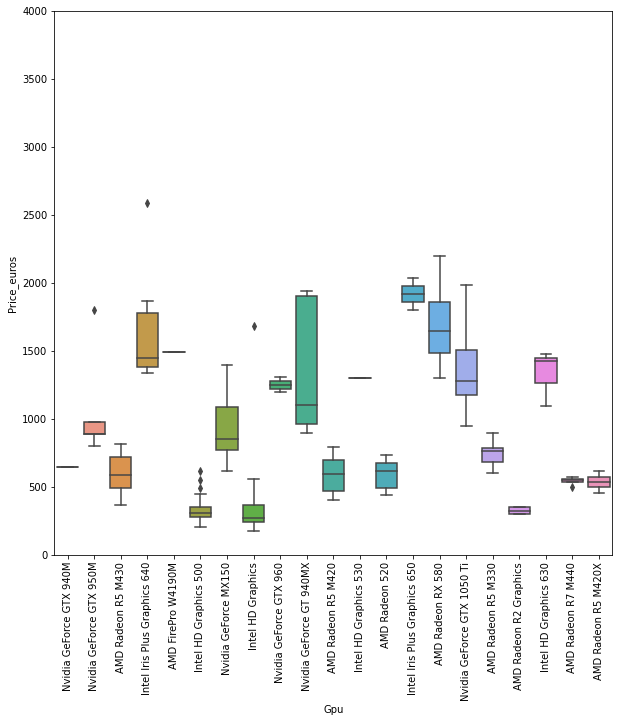

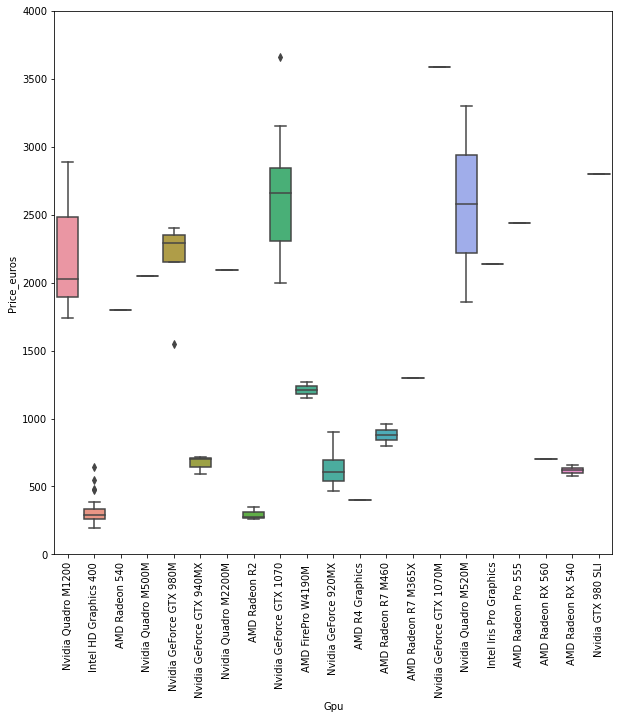

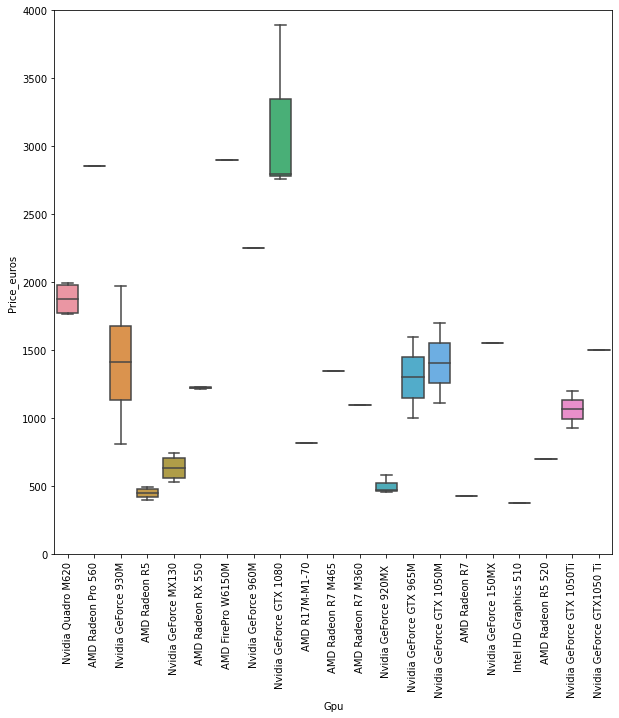

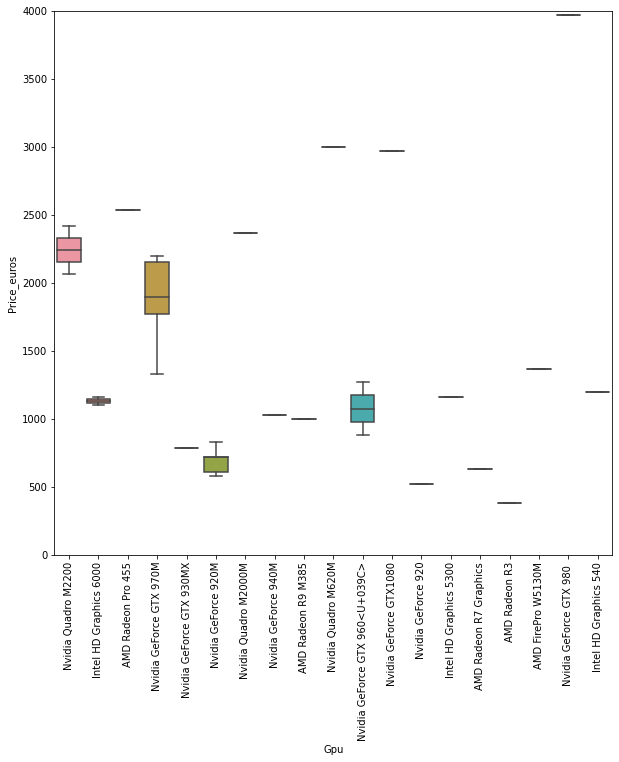

In [136]:
for i in list(range(0,103,21)):
    f, ax = plt.subplots(figsize=(10, 10))
    fig = sns.boxplot(x='Gpu', y='Price_euros', data=train, order=gpu_values[i:(i+21)])
    plt.xticks(rotation=90)
    plt.ylim(0, 4000)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Windows 10'),
  Text(1, 0, 'Chrome OS'),
  Text(2, 0, 'Windows 10 S'),
  Text(3, 0, 'No OS'),
  Text(4, 0, 'Mac OS X'),
  Text(5, 0, 'Windows 7'),
  Text(6, 0, 'macOS'),
  Text(7, 0, 'Linux'),
  Text(8, 0, 'Android')])

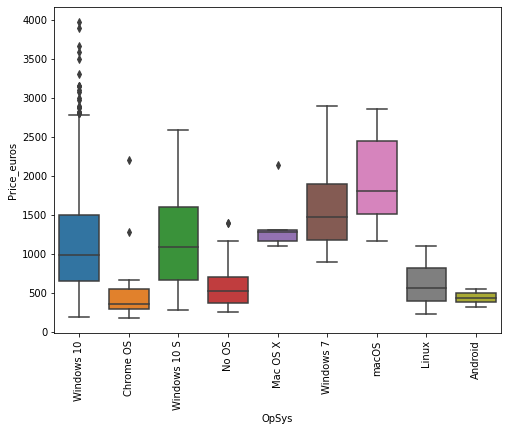

In [137]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OpSys', y='Price_euros', data=train)
plt.xticks(rotation=90)

# Step 5: Null Value Replacement

We will check the number of null values for each variable 
in the training and test sets.

In [138]:
train.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight (kg)         0
Price_euros         0
dtype: int64

In [139]:
test.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight (kg)         0
Price_euros         0
dtype: int64

There are no null values in the training and test sets.

# Step 6: Feature Engineering and Value Transformation

We will work with the categorical variables.  

In [140]:
cat_feats = train.select_dtypes(include='object').columns.to_list()
cat_feats

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys']

## Product Variable

First, we will look closer at the Product variable.  
We will check if there are any data entry 
errors in the training and test sets.

We will begin with the training set.  
We will sort the list of values of 
the Product variable in alphabetical order.  
Then we will check for data entry errors 
by looking at 50 values at a time.

In [141]:
products.sort()

In [142]:
products[:50]

array(['14-am079na (N3710/8GB/2TB/W10)',
       '15-AC110nv (i7-6500U/6GB/1TB/Radeon',
       '15-AY023na (N3710/8GB/2TB/W10)',
       '15-BA015wm (E2-7110/4GB/500GB/W10)',
       '15-BS026nv (i5-7200U/8GB/256GB/Radeon',
       '15-BS028nv (i3-6006U/4GB/1TB/Radeon',
       '15-BS078nr (i7-7500U/8GB/1TB/W10)',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)',
       '15-BS103nv (i5-8250U/6GB/256GB/Radeon',
       '15-BW004nv (A9-9420/4GB/256GB/Radeon',
       '15-BW037na (A9-9420/4GB/1TB/Radeon',
       '15-BW091ND (A9-9420/6GB/1TB',
       '15-BW094nd (A6-9220/8GB/128GB/W10)',
       '15-ay047nv (i3-6006U/6GB/1TB/Radeon',
       '15-ba043na (A12-9700P/8GB/2TB/W10)',
       '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       '15-bs005nv (i3-6006U/4GB/1TB',
       '15-bs011nv (i7-7500U/4GB/500GB/Radeon',
       '15-bs015dx (i5-7200U/8GB/1TB/W10)',
       '15-bs017nv (i7-7500U/8GB/256GB/Radeon',
       '15-bs018nq (i3-6006U/4GB/500GB/FHD/No',
       '15-bs023nv (i3-6006U/4GB/1TB/FHD/W10)',


Note that for products beginning with a number, like '15', for example, 
the string contains uppercase and lowercase characters and there is also 
no consistency in notation.  For example, there is a laptop with the brand
"15-BS026nv" and another laptop with the brand "15-bs002nv".  For these 
types of products, we will change all characters to uppercase.

Products whose names begin with '14', '15', and '17' have the brand 'Pavilion'.

Note that the product '320-15ISK (i3-6006U/4GB/1TB/GeForce' is of the brand 'IdeaPad'.

Note that the product 'A541NA-GO342 (N3350/4GB/500GB/Linux)' is of the brand 'Vivobook'.

Note that the product 'A715-71G-59DH (I5-7300HQ/8GB/1TB/GEFORCE' is of the brand 'Aspire'.


In [143]:
products[50:100]

array(['Alienware 15', 'Alienware 17', 'Aspire 1', 'Aspire 3', 'Aspire 5',
       'Aspire 7', 'Aspire A315-31', 'Aspire A315-51', 'Aspire A515-51G',
       'Aspire A515-51G-32MX', 'Aspire A515-51G-37JS',
       'Aspire A515-51G-59QF', 'Aspire A517-51G', 'Aspire A715-71G',
       'Aspire E5-475', 'Aspire E5-575', 'Aspire E5-576G',
       'Aspire E5-774G', 'Aspire ES1-523', 'Aspire ES1-531',
       'Aspire ES1-533', 'Aspire ES1-572', 'Aspire F5-573G', 'Aspire R7',
       'Aspire VX5-591G', 'B51-80 (i5-6200U/8GB/1008GB/Radeon',
       'B51-80 (i5-6200U/8GB/1TB/Radeon',
       'B51-80 (i7-6500U/8GB/1008GB/Radeon', 'Blade Pro', 'Blade Stealth',
       'C740-C9QX (3205U/2GB/32GB/Chrome', 'Chromebook 11',
       'Chromebook 13', 'Chromebook 14', 'Chromebook 15', 'Chromebook 3',
       'Chromebook C202SA', 'Chromebook C731-C78G',
       'Chromebook C738T-C2EJ', 'Chromebook C910-C2ST',
       'Chromebook CB5-571-C1DZ', 'Chromebook Flip', 'Chromebook N23',
       'Chromebook Plus', 'Chromebook X

Note that the product 'C740-C9QX (3205U/2GB/32GB/Chrome' has the brand 'Chromebook'.

Note that the product 'E402WA-GA007T (E2-6110/4GB/64GB/W10' is of the brand 'Vivobook'.

Note that the products 'E5 774G' and 'ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10)' 
have the brand 'Aspire'.


In [144]:
products[100:150]

array(['EliteBook 1040', 'EliteBook 820', 'EliteBook 840',
       'EliteBook 850', 'EliteBook Folio', 'EliteBook x360',
       'Elitebook 1040', 'Elitebook 820', 'Elitebook 840',
       'Elitebook 850', 'Elitebook Folio', 'Envy 13-AB002nv',
       'Envy 13-AB020nr', 'Envy 13-AD007nv', 'Envy 13-ad009n',
       'Envy 17-U275cl', 'Envy x360', 'Extensa EX2540',
       'Extensa EX2540-58KR', 'F756UX-T4201D (i7-7500U/8GB/128GB',
       'FX502VM-AS73 (i7-7700HQ/16GB/1TB',
       'FX502VM-DM105T (i7-6700HQ/8GB/1TB/GeForce',
       'FX503VM-E4007T (i7-7700HQ/16GB/1TB',
       'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon',
       'FX553VD-DM627T (i5-7300HQ/8GB/1TB',
       'FX553VD-FY647T (i7-7700HQ/8GB/256GB/GeForce',
       'FX753VD-GC007T (i7-7700HQ/8GB/1TB',
       'FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce',
       'FX753VD-GC086T (i5-7300HQ/8GB/1TB',
       'FX753VD-GC461T (i7-7700HQ/16GB/1TB',
       'FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce',
       'FX753VE-GC155T (i7-7700HQ/16GB/1TB', 'Fl

Note that there are data entry errors.  

Products with the brand 'EliteBook' have the same 
brand as laptops with the brand spelled 'Elitebook'.  
For these products, we will change the brand to 'Elitebook'.

Products with the brand 'ENVY' have the same 
brand as laptops with the brand spelled 'Envy'.

Note that the product 'GL553VE-FY082T (i7-7700HQ/8GB/1TB' is of the brand 'ROG'.



In [145]:
products[150:200]

array(['GP72VR Leopard', 'GS40 Phantom', 'GS60 Ghost', 'GS63VR 7RF',
       'GS63VR 7RG', 'GS70 Stealth', 'GS73VR Stealth', 'GT62VR 6RD',
       'GT62VR 7RE', 'GT72S Dominator', 'GT72VR Dominator', 'GT73EVR 7RE',
       'GT80S 6QE', 'GT80S 6QF-074US', 'GV62 7RD-1686NL', 'GV62M 7RD',
       'Gram 14Z970', 'IdeaPad 100S-14IBR', 'IdeaPad 110-15IBR',
       'IdeaPad 110-15ISK', 'IdeaPad 110-17ACL', 'IdeaPad 120S-14IAP',
       'IdeaPad 300-17ISK', 'IdeaPad 310-15ABR', 'IdeaPad 310-15IKB',
       'IdeaPad 310-15ISK', 'IdeaPad 320-15ABR', 'IdeaPad 320-15AST',
       'IdeaPad 320-15IAP', 'IdeaPad 320-15IKB', 'IdeaPad 320-15IKBN',
       'IdeaPad 320-15ISK', 'IdeaPad 320-17IKB', 'IdeaPad 320-17IKBR',
       'IdeaPad 320-17ISK', 'IdeaPad 500-15ISK', 'IdeaPad 510-15IKB',
       'IdeaPad 510s-14IKB', 'IdeaPad 520S-14IKB', 'IdeaPad 520s-14IKB',
       'IdeaPad 720S-13IKB', 'IdeaPad 720S-14IKB', 'IdeaPad Y700-15ACZ',
       'IdeaPad Y700-15ISK', 'IdeaPad Y900-17ISK', 'IdeaPad Y910-17ISK',
       'I

Note that there is a data entry error.  Products with the brand 'IdeaPad' 
have the same brand as laptops with the brand spelled 'Ideapad'.  

In [146]:
products[200:250]

array(['Ideapad 520-15IKBR', 'Ideapad 700-15ISK', 'Inspiron 3168',
       'Inspiron 3179', 'Inspiron 3552', 'Inspiron 3567', 'Inspiron 3576',
       'Inspiron 5368', 'Inspiron 5370', 'Inspiron 5378', 'Inspiron 5379',
       'Inspiron 5567', 'Inspiron 5568', 'Inspiron 5570', 'Inspiron 5577',
       'Inspiron 5578', 'Inspiron 5579', 'Inspiron 5767', 'Inspiron 5770',
       'Inspiron 7378', 'Inspiron 7559', 'Inspiron 7560', 'Inspiron 7567',
       'Inspiron 7570', 'Inspiron 7577', 'Inspiron 7579', 'Inspiron 7773',
       'K146 (N3350/4GB/32GB/W10)', 'K147 (N3350/4GB/32GB/FHD/W10)',
       'K556UR-DM621T (i7-7500U/8GB/256GB/GeForce',
       'K756UX-T4340T (i5-7200U/8GB/500GB',
       'L403NA-GA013TS (N3350/4GB/32GB/W10)',
       'L502NA-GO052T (N3350/4GB/128GB/W10)', 'LapBook 12.3',
       'LapBook 15.6"', 'Lapbook 15,6', 'Laptop MSI', 'Latitude 3180',
       'Latitude 3380', 'Latitude 3480', 'Latitude 3570', 'Latitude 3580',
       'Latitude 5289', 'Latitude 5480', 'Latitude 5490', 'Latit

Note that the products 'L403NA-GA013TS (N3350/4GB/32GB/W10)'
and 'L502NA-GO052T (N3350/4GB/128GB/W10)' have the brand 'Vivobook'.

Note that there is a data entry error.  Products with the brand 'LapBook' 
have the same brand as laptops with the brand spelled 'Lapbook'.


In [147]:
products[250:300]

array(['Latitude E5270', 'Latitude E5470', 'Latitude E5570',
       'Latitude E7270', 'Latitude E7470', 'Legion Y520-15IKBN',
       'Legion Y720-15IKB', 'Lenovo IdeaPad', 'Leopard GP72M',
       'LifeBook A557', 'MacBook 12"', 'MacBook Air', 'MacBook Pro',
       'Macbook Air', 'MateBook X', 'Mi Notebook',
       'N23 (N3060/4GB/128GB/W10)', 'N42-20 Chromebook', 'Nitro AN515-51',
       'Noteb Pav', 'Notebook 9', 'Notebook Odyssey', 'Omen 15-AX205na',
       'Omen 15-ce006nv', 'Omen 15-ce007nv', 'Omen 17-AN010nv',
       'Omen 17-an006nv', 'Omen 17-an012dx', 'Omen 17-w207nv',
       'Omen 17-w212nv', 'PL60 7RD', 'Pavilion 14-BK001nv',
       'Pavilion 15-AW003nv', 'Pavilion 15-CK000nv',
       'Pavilion 15-cb003nv', 'Pavilion Power', 'Pavilion X360',
       'Pavilion x360', 'Pixelbook (Core', 'Portege A30-C-1CZ',
       'Portege X30-D-10L', 'Portege X30-D-10V', 'Portege Z30-C-16H',
       'Portege Z30-C-16J', 'Portege Z30-C-16L', 'Portege Z30-C-1CV',
       'Portege Z30-C-1CW', 'Porte

Note that there are data entry errors.

The product 'Lenovo IdeaPad' has the same brand as 'IdeaPad'.

Products with the brand 'MacBook' have the same brand as 
laptops with the brand spelled 'Macbook'.

Note that the products 'N23 (N3060/4GB/128GB/W10)'
and 'N42-20 Chromebook' have the brand 'Chromebook'.

Products with the brand 'Portege' have the same brand as 
laptops with the brand spelled 'Portégé'.

In [148]:
products[300:350]

array(['Precision 3520', 'Precision 5520', 'Precision 7720',
       'Precision M5520', 'Predator 17', 'Predator G9-793',
       'Pro P2540UA-AB51', 'Pro P2540UA-XO0192R', 'Pro P2540UA-XO0198T',
       'Pro P2540UA-XS51', 'ProBook 430', 'ProBook 440', 'ProBook 450',
       'ProBook 470', 'ProBook 640', 'ProBook 650', 'Probook 430',
       'Probook 440', 'Probook 450', 'Probook 470', 'Probook 640',
       'Probook 650', 'Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)',
       'Q524UQ-BHI7T15 (i7-7500U/12GB/2TB/GeForce',
       'Q534UX-BHI7T19 (i7-7500U/16GB/2TB',
       'R417NA-RS01 (N3350/4GB/32GB/W10)',
       'R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10)', 'ROG G701VI',
       'ROG G701VO', 'ROG G703VI-E5062T', 'ROG GL553VE-FY022',
       'ROG Strix', 'ROG Zephyrus', 'Rog G752VL-GC088D',
       'Rog G752VS-BA171T', 'Rog G752VT-GC073T', 'Rog G752VY-GC229T',
       'Rog GL502VM-DS74', 'Rog GL552VW-CN470T', 'Rog GL553VE-DS74',
       'Rog GL702VM-GC017T', 'Rog GL702VS-BA023T', 'Rog GL702VS-GC09

Products with the brand 'ProBook' have the same brand as 
laptops with the brand spelled 'Probook'.

Products with the brand 'ROG' have the same brand as 
laptops with the brand spelled 'Rog'.

Note that the products 'SP315-51 (i7-7500U/12GB/1TB/FHD/W10)' 
and 'SP714-51 (i7-7Y75/8GB/256GB/FHD/W10)' have the brand 'Spin'.


In [149]:
products[350:400]

array(['Satellite Pro', 'SmartBook 130', 'SmartBook 140', 'SmartBook 141',
       'Smartbook 142', 'Spectre 13-V100nv', 'Spectre 13-V111dx',
       'Spectre Pro', 'Spectre X360', 'Spectre x360', 'Spin 3', 'Spin 5',
       'Spin SP111-31', 'Stream 11-Y000na', 'Stream 14-AX000nv',
       'Stream 14-AX001nv', 'Stream 14-AX040wm', 'Surface Laptop',
       'Swift 3', 'Swift 7', 'Swift SF114-31-P5HY',
       'TMX349-G2-M-50FS (i5-7200U/8GB/256GB/FHD/W10)', 'Tecra A40-C-1DF',
       'Tecra A40-C-1KF', 'Tecra A50-C-1ZV', 'Tecra A50-C-218',
       'Tecra A50-C-21G', 'Tecra A50-D-11D', 'Tecra A50-D-11M',
       'Tecra X40-D-10G', 'Tecra X40-D-10H', 'Tecra X40-D-10Z',
       'Tecra Z40-C-136', 'Tecra Z40-C-161', 'Tecra Z50-C-140',
       'Tecra Z50-C-144', 'Tecra Z50-D-10E', 'ThinkPad 13',
       'ThinkPad E480', 'ThinkPad E570', 'ThinkPad E580', 'ThinkPad L460',
       'ThinkPad L470', 'ThinkPad L570', 'ThinkPad P40', 'ThinkPad P51',
       'ThinkPad P51s', 'ThinkPad T460', 'ThinkPad T460s',
   

Products with the brand 'SmartBook' have the same brand as 
laptops with the brand spelled 'Smartbook'.

The product 'TMX349-G2-M-50FS (i5-7200U/8GB/256GB/FHD/W10)' 
is of the brand 'TravelMate'.


In [150]:
products[400:450]

array(['ThinkPad T470p', 'ThinkPad T470s', 'ThinkPad T570', 'ThinkPad X1',
       'ThinkPad X270', 'ThinkPad Yoga', 'Thinkpad 13', 'Thinkpad E470',
       'Thinkpad E570', 'Thinkpad L560', 'Thinkpad P50', 'Thinkpad P51',
       'Thinkpad P51s', 'Thinkpad P71', 'Thinkpad T460', 'Thinkpad T460p',
       'Thinkpad T460s', 'Thinkpad T470', 'Thinkpad T470p',
       'Thinkpad T470s', 'Thinkpad T560', 'Thinkpad T570', 'Thinkpad X1',
       'Thinkpad X260', 'Thinkpad X270', 'Thinkpad Yoga', 'TravelMate B',
       'TravelMate B117-M', 'TravelMate P238-M', 'TravelMate P259-G2',
       'UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10)',
       'UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10)',
       'UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce',
       'UX510UX-CN269T (i7-7500U/8GB/256GB',
       'V110-15IAP (N3350/4GB/1TB/No',
       'V110-15ISK (i3-6006U/4GB/128GB/W10)',
       'V110-15ISK (i3-6006U/4GB/1TB/Radeon',
       'V110-15ISK (i3-6006U/4GB/500GB/W10)',
       'V110-15ISK (i5-6200U/4GB/128GB/W10

Products with the brand 'ThinkPad' have the same brand as 
laptops with the brand spelled 'Thinkpad'.

Products whose name begin with 'UX' have the brand 'ZenBook'.

Products whose names begin with "V110", "V310", and "V320" 
have the brand 'IdeaPad'.

In [151]:
products[450:500]

array(['V330-15IKB (i3-7130U/4GB/128GB/FHD/W10)',
       'V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)',
       'V330-15IKB (i5-8250U/8GB/256GB/FHD/W10)', 'VivoBook E12',
       'VivoBook E201NA', 'VivoBook E403NA', 'VivoBook Flip',
       'VivoBook L402NA', 'VivoBook Max', 'VivoBook Pro', 'VivoBook S14',
       'VivoBook S15', 'VivoBook X540YA-XX519T', 'Vivobook E200HA',
       'Vivobook Max', 'Vostro 3568', 'Vostro 5370', 'Vostro 5468',
       'Vostro 5568', 'X505BP-BR019T (A9-9420/4GB/1TB/Radeon',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)',
       'X541NA (N3350/4GB/1TB/FHD/W10)', 'X541NA (N3350/4GB/1TB/Linux)',
       'X541NA (N4200/4GB/1TB/W10)', 'X541NA-GO020T (N3350/4GB/1TB/W10)',
       'X541NA-GO121 (N4200/4GB/1TB/Linux)',
       'X541NA-GO414T (N3350/8GB/1TB/W10)',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)',
       'X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce',
       'X542UQ-DM117 (i3-7100U/8GB/1TB/GeForce',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce',
     

Products whose name begins with "V330" have the brand 'IdeaPad'.

Products with the brand 'VivoBook' have the same brand as 
laptops with the brand spelled 'Vivobook'.

All products whose names begin with 'X5' or 'X7' have the brand 'Vivobook'.

In [152]:
products[500:]

array(['Yoga 900S-12ISK', 'Yoga 910-13IKB', 'Yoga 920-13IKB', 'Yoga Book',
       'ZBook 15', 'ZBook 15u', 'ZBook 17', 'ZBook Studio', 'Zbook 15',
       'ZenBook 3', 'ZenBook Flip', 'ZenBook Pro', 'ZenBook UX305CA-UBM1',
       'ZenBook UX310UA-WB71', 'ZenBook UX310UQ-GL026T',
       'ZenBook UX430UA', 'ZenBook UX530UQ-PRO', 'Zenbook 3',
       'Zenbook Flip', 'Zenbook UX330UA-AH5Q', 'Zenbook UX430UA',
       'Zenbook UX510UW-FI095T'], dtype=object)

Products with the brand 'ZBook' have the same brand as 
laptops with the brand spelled 'Zbook'.

Products with the brand 'ZenBook' have the same brand as 
laptops with the brand spelled 'Zenbook'.

Next, we will look at the test set.  We will check for data entry errors 
different from the ones in the training set.  However, when we correct 
the errors in training set, then we will have to make those same changes to
the test set.

We will sort the list of values of 
the Product variable in alphabetical order.  
Then we will check for data entry errors 
by looking at 50 values at a time.

In [153]:
products_test = test['Product'].unique()

In [154]:
products_test.sort()

In [155]:
products_test[:50]

array(['110-15ACL (A6-7310/4GB/500GB/W10)',
       '15-AC110nv (i7-6500U/6GB/1TB/Radeon',
       '15-bs012nv (i7-7500U/8GB/1TB/Radeon',
       '15-ra044nv (N3060/4GB/500GB/W10)',
       '15-rb013nv (E2-9000e/4GB/500GB/W10)',
       '17-AK091ND (A9-9420/8GB/1TB/W10)', '250 G6', '255 G6',
       'Alienware 15', 'Alienware 17', 'Aspire 3', 'Aspire 5',
       'Aspire A515-51G', 'Aspire A517-51G', 'Aspire E5-576G',
       'Aspire ES1-523', 'Aspire F5-573G-510L',
       'B51-80 (i7-6500U/4GB/1008GB/FHD/W7)', 'Blade Pro',
       'CB5-132T-C9KK (N3160/4GB/32GB/Chrome', 'Chromebook Flip',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)', 'EliteBook 1040',
       'EliteBook 840', 'EliteBook 850', 'EliteBook Folio',
       'EliteBook x360', 'Elitebook 820', 'Elitebook 840',
       'Envy 13-AB077cl', 'FX502VM-DM560T (i7-7700HQ/8GB/1TB',
       'FX503VD-E4022T (i7-7700HQ/8GB/1TB/GeForce',
       'G701VO-IH74K (i7-6820HK/32GB/2x',
       'G752VY-GC162T (i7-6700HQ/16GB/1TB', 'GE62 Apache', 'GE63VR 7RF',

Note that the product '110-15ACL (A6-7310/4GB/500GB/W10)' is of the brand 'IdeaPad'.

Note that the product 'CB5-132T-C9KK (N3160/4GB/32GB/Chrome' has the brand 'Chromebook'.

Note that the product 'E402WA-GA010T (E2-6110/2GB/32GB/W10)' is of the brand 'Vivobook'.

Note that the products'G701VO-IH74K (i7-6820HK/32GB/2x' and
'G752VY-GC162T (i7-6700HQ/16GB/1TB' have the brand 'ROG'.


In [156]:
products_test[50:100]

array(['Gram 15Z975', 'IdeaPad 310-15ISK', 'IdeaPad 320-14IAP',
       'IdeaPad 320-15IKB', 'IdeaPad 320-15ISK', 'IdeaPad 320s-14IKB',
       'IdeaPad 510-15ISK', 'IdeaPad Y900-17ISK', 'Ideapad 320-15IKBN',
       'Ideapad 510S-13IKB', 'Inspiron 3552', 'Inspiron 3567',
       'Inspiron 3576', 'Inspiron 5370', 'Inspiron 5379', 'Inspiron 5567',
       'Inspiron 5570', 'Inspiron 5579', 'Inspiron 5770', 'Inspiron 7567',
       'Inspiron 7577', 'Inspiron 7773', 'Inspiron 7779', 'Insprion 5767',
       'Latitude 3380', 'Latitude 5480', 'Latitude 5580', 'Latitude 7280',
       'Latitude E5570', 'Legion Y520-15IKBN', 'Legion Y720-15IKB',
       'LifeBook A556', 'Lifebook A557', 'MacBook 12"', 'MacBook Air',
       'MacBook Pro', 'Macbook Air', 'Mi Notebook', 'Nitro 5', 'Omen -',
       'Omen 17-W006na', 'Omen 17-W295', 'Pavilion 15-AW003nv',
       'Pavilion 15-BC000nv', 'Pavilion X360', 'Pixelbook (Core',
       'Portege X20W-D-10V', 'Portege X30-D-10J', 'Portege X30-D-10K',
       'Portege X

Products with the brand 'LifeBook' have the same brand as 
laptops with the brand spelled 'Lifebook'.

In [157]:
products_test[100:150]

array(['Portege Z30-C-16P', 'Portege Z30-C-16Z', 'Portégé Z30-C-16K',
       'Precision 3520', 'Precision 7520', 'ProBook 430', 'ProBook 440',
       'ProBook 450', 'ProBook 650', 'ProBook x360', 'Probook 430',
       'Probook 450', 'Probook 470', 'ROG G752VSK-GC493T',
       'ROG GL703VD-GC028T', 'Rog G701VIK-BA060T', 'Rog G752VL-UH71T',
       'Rog GL502VS', 'Rog GL552VW-DM201T', 'Rog GL553VE-FY052T',
       'Rog GL702VM-GC354T', 'Rog GL753VD-GC042T', 'Rog Strix',
       'Satellite Pro', 'SmartBook Edge', 'Spectre Pro', 'Spectre x360',
       'Stream 11-Y000na', 'Surface Laptop', 'Swift 3',
       'TP501UA-CJ131T (i5-7200U/8GB/1TB/W10)', 'Tecra A40-C-1E5',
       'Tecra Z40-C-12X', 'Tecra Z40-C-12Z', 'ThinkPad 13',
       'ThinkPad E470', 'ThinkPad E480', 'ThinkPad E580', 'ThinkPad L470',
       'ThinkPad L570', 'ThinkPad P70', 'ThinkPad T460', 'ThinkPad T470',
       'ThinkPad T470s', 'ThinkPad T560', 'ThinkPad T570', 'ThinkPad X1',
       'ThinkPad Yoga', 'Thinkpad 13', 'Thinkpad P

Note that the product 'TP501UA-CJ131T (i5-7200U/8GB/1TB/W10)' is of the brand 'Vivobook'.

In [158]:
products_test[150:]

array(['Thinkpad T470', 'Thinkpad X1', 'Thinkpad X270', 'TravelMate B',
       'V110-15IAP (N3350/4GB/128GB/No',
       'V110-15IKB (i5-7200U/4GB/128GB/W10)',
       'V110-15ISK (3855U/4GB/500GB/W10)',
       'V110-15ISK (i3-6006U/4GB/1TB/No',
       'V110-15ISK (i5-6200U/4GB/500GB/No',
       'V142 (X5-Z8350/2GB/32GB/W10)', 'V310-15IKB (i5-7200U/4GB/1TB/No',
       'V310-15ISK (i3-6006U/4GB/128GB/FHD/No',
       'V330-15IKB (i5-8250U/4GB/256GB/FHD/W10)',
       'V330-15IKB (i7-8550U/8GB/256GB/FHD/W10)',
       'V510-15IKB (i5-7200U/8GB/256GB/FHD/No', 'VivoBook Pro',
       'Vivobook X541UV-DM1217T', 'Vostro 3559', 'Vostro 3568',
       'Vostro 5468', 'Vostro 5471', 'Vostro 5568',
       'X540SA-RBPDN09 (N3710/4GB/1TB/W10)',
       'X541NA-PD1003Y (N4200/4GB/500GB/W10)',
       'X550VX-XX015D (i5-6300HQ/4GB/1TB/GeForce',
       'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'XPS 13', 'XPS 15',
       'Yoga 520-14IKB', 'Yoga 700-11ISK', 'Yoga

Products whose name begins with "V510" have the brand 'IdeaPad'.

**<center>List of changes to be made to Training and Test Sets</center>**
    
1.  Change all characters to uppercase. 

2.  Products whose names begin with '14', '15', and '17' should have the brand 'Pavilion'.

3.  The product '320-15ISK (i3-6006U/4GB/1TB/GeForce' should have the brand 'IdeaPad'.

4.  The product 'A541NA-GO342 (N3350/4GB/500GB/Linux)' should have the brand 'Vivobook'.

5.  The product 'A715-71G-59DH (I5-7300HQ/8GB/1TB/GEFORCE' should have the brand 'Aspire'.

6.  The product 'C740-C9QX (3205U/2GB/32GB/Chrome' should have the brand 'Chromebook'.

7.  The product 'E402WA-GA007T (E2-6110/4GB/64GB/W10' should have the brand 'Vivobook'.

8.  The products 'E5 774G' and 'ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10)' 
    should have the brand 'Aspire'.
   
9.  Products with the brand 'EliteBook' should have the same brand as laptops 
    with the brand spelled 'Elitebook'.  

10. Products with the brand 'ENVY' should have the same brand as laptops with 
    the brand spelled 'Envy'.

11. The product 'GL553VE-FY082T (i7-7700HQ/8GB/1TB' should have the brand 'ROG'.

12. Products with the brand 'IdeaPad' should have the same brand as laptops 
    with the brand spelled 'Ideapad'. 
    
13. The products 'L403NA-GA013TS (N3350/4GB/32GB/W10)' and 
    'L502NA-GO052T (N3350/4GB/128GB/W10)' should have the brand 'Vivobook'.

14. Products with the brand 'LapBook' should have the same brand as 
    laptops with the brand spelled 'Lapbook'.
    
15. The product 'Lenovo IdeaPad' should have the same brand as 'IdeaPad'.

16. Products with the brand 'MacBook' should have the same brand as 
    laptops with the brand spelled 'Macbook'.

17. The products 'N23 (N3060/4GB/128GB/W10)'and 'N42-20 Chromebook' 
    should have the brand 'Chromebook'.

18. Products with the brand 'Portege' should have the same brand as 
    laptops with the brand spelled 'Portégé'.
    
19. Products with the brand 'ProBook' should have the same brand as 
    laptops with the brand spelled 'Probook'.

20. Products with the brand 'ROG' should have the same brand as 
    laptops with the brand spelled 'Rog'.

21. The products 'SP315-51 (i7-7500U/12GB/1TB/FHD/W10)' and 
    'SP714-51 (i7-7Y75/8GB/256GB/FHD/W10)' have the brand 'Spin'.

22. Products with the brand 'SmartBook' should have the same brand as 
    laptops with the brand spelled 'Smartbook'.

23. The product 'TMX349-G2-M-50FS (i5-7200U/8GB/256GB/FHD/W10)' 
    should have the brand 'TravelMate'.
    
24. Products with the brand 'ThinkPad' should have the same brand as 
    laptops with the brand spelled 'Thinkpad'.

25. Products whose name begin with 'UX' should have the brand 'ZenBook'.

26. Products whose names begin with "V110", "V310", and "V320" should
    have the brand 'IdeaPad'.
    
27. Products whose name begins with "V330" should have the brand 'IdeaPad'.

28. Products with the brand 'VivoBook' should have the same brand as 
    laptops with the brand spelled 'Vivobook'.

29. All products whose names begin with 'X5' or 'X7' 
    should have the brand 'Vivobook'.
    
30. Products with the brand 'ZBook' should have the same brand as 
    laptops with the brand spelled 'Zbook'.

31. Products with the brand 'ZenBook' should have the same brand as 
    laptops with the brand spelled 'Zenbook'.
    
32. The product '110-15ACL (A6-7310/4GB/500GB/W10)' should have the brand 'IdeaPad'.

33. The product 'CB5-132T-C9KK (N3160/4GB/32GB/Chrome' should have the brand 'Chromebook'.

34.  The product 'E402WA-GA010T (E2-6110/2GB/32GB/W10)' should have the brand 'Vivobook'.

35. The products'G701VO-IH74K (i7-6820HK/32GB/2x' and 
    'G752VY-GC162T (i7-6700HQ/16GB/1TB' should have the brand 'ROG'.
    
36. Products with the brand 'LifeBook' should have the same brand as 
    laptops with the brand spelled 'Lifebook'.
    
37. The product 'TP501UA-CJ131T (i5-7200U/8GB/1TB/W10)' should have the brand 'Vivobook'.

38. Products whose name begins with "V510" should have the brand 'IdeaPad'.

 

We will make Change # 1.  
This should also take care of Changes # 9, 10 ,12, 14, 16, 19, 20, 
22, 24, 28, 30, 31, and 36. 

In [159]:
train['Product'] = train['Product'].str.upper()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
test['Product'] = test['Product'].str.upper()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We will make Change # 2.

In [161]:
pav_list = ['14', '15', '17']

In [162]:
for p in pav_list:
    mask = (train['Product'].str.startswith(p))
    train.loc[mask, 'Product'] = 'PAVILION ' + train['Product']

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [163]:
for p in pav_list:
    mask = (test['Product'].str.startswith(p))
    test.loc[mask, 'Product'] = 'PAVILION ' + test['Product']

We will make Changes # 3 and 32.

In [164]:
idea_list_1 = [
    '320-15ISK (I3-6006U/4GB/1TB/GEFORCE',
    '110-15ACL (A6-7310/4GB/500GB/W10)'
]

In [165]:
mask_idea_train = train['Product'].isin(idea_list_1)
train.loc[mask_idea_train, 'Product'] = "IDEAPAD " + train['Product']

In [166]:
mask_idea_test = test['Product'].isin(idea_list_1)
test.loc[mask_idea_test, 'Product'] = "IDEAPAD " + test['Product']

We will make Changes # 4, 7, 13, 34 and 37.

In [167]:
vivo_list_1 = [
    'A541NA-GO342 (N3350/4GB/500GB/LINUX)',
    'E402WA-GA007T (E2-6110/4GB/64GB/W10',
    'L403NA-GA013TS (N3350/4GB/32GB/W10)',
    'L502NA-GO052T (N3350/4GB/128GB/W10)',
    'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
    'TP501UA-CJ131T (I5-7200U/8GB/1TB/W10)'
]

In [168]:
mask_vivo_train = train['Product'].isin(vivo_list_1)
train.loc[mask_vivo_train, 'Product'] = "VIVOBOOK " + train['Product']

In [169]:
mask_vivo_test = test['Product'].isin(vivo_list_1)
test.loc[mask_vivo_test, 'Product'] = "VIVOBOOK " + test['Product']

We will make Changes # 5 and 8.

In [170]:
aspire_list_1 = [
    'A715-71G-59DH (I5-7300HQ/8GB/1TB/GEFORCE',
    'E5 774G',
    'ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10)' 
]

In [171]:
mask_aspire_train = train['Product'].isin(aspire_list_1)
train.loc[mask_aspire_train, 'Product'] = "ASPIRE " + train['Product']

In [172]:
mask_aspire_test = test['Product'].isin(aspire_list_1)
test.loc[mask_aspire_test, 'Product'] = "ASPIRE " + test['Product']

We will make Changes # 6, 17, and 33.

In [173]:
chrome_list_1 = [
    'C740-C9QX (3205U/2GB/32GB/CHROME',
    'N23 (N3060/4GB/128GB/W10)',
    'N42-20 CHROMEBOOK',
    'CB5-132T-C9KK (N3160/4GB/32GB/CHROME' 
]

In [174]:
mask_chrome_train = train['Product'].isin(chrome_list_1)
train.loc[mask_chrome_train, 'Product'] = "CHROMEBOOK " + train['Product']

In [175]:
mask_chrome_test = test['Product'].isin(chrome_list_1)
test.loc[mask_chrome_test, 'Product'] = "CHROMEBOOK " + test['Product']

We will make Changes # 11 and 35.

In [176]:
rog_list_1 = [
    'GL553VE-FY082T (I7-7700HQ/8GB/1TB',
    'G701VO-IH74K (I7-6820HK/32GB/2X',
    'G752VY-GC162T (I7-6700HQ/16GB/1TB'
]

In [177]:
mask_rog_train = train['Product'].isin(rog_list_1)
train.loc[mask_rog_train, 'Product'] = "ROG " + train['Product']

In [178]:
mask_rog_test = test['Product'].isin(rog_list_1)
test.loc[mask_rog_test, 'Product'] = "ROG " + test['Product']

We will make Change # 15.

In [179]:
mask_idea_train_2 = train['Product'].str.startswith('LENOVO')
train.loc[mask_idea_train_2, 'Product'] = "IDEAPAD"

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [180]:
mask_idea_test_2 = test['Product'].str.startswith('LENOVO')
test.loc[mask_idea_test_2, 'Product'] = "IDEAPAD"

We will make Change # 18.

In [181]:
mask_portege_train = train['Product'].str.startswith('PORTÉGÉ')
train.loc[mask_portege_train, 'Product'] = train['Product'].str.replace('É', 'E')

In [182]:
mask_portege_test = test['Product'].str.startswith('PORTÉGÉ')
test.loc[mask_portege_test, 'Product'] = test['Product'].str.replace('É', 'E')

We will make Change # 21.

In [183]:
spin_list_1 = [
    'SP315-51 (I7-7500U/12GB/1TB/FHD/W10)',
    'SP714-51 (I7-7Y75/8GB/256GB/FHD/W10)'
]

In [184]:
mask_spin_train = train['Product'].isin(spin_list_1)
train.loc[mask_spin_train, 'Product'] = "SPIN " + train['Product']

In [185]:
mask_spin_test = test['Product'].isin(spin_list_1)
test.loc[mask_spin_test, 'Product'] = "SPIN " + test['Product']

We will make Change # 23.

In [186]:
mask_travel_train = train['Product'].str.startswith('TMX')
train.loc[mask_travel_train, 'Product'] = "TRAVELMATE " + train['Product']

In [187]:
mask_travel_test = test['Product'].str.startswith('TMX')
test.loc[mask_travel_test, 'Product'] = "TRAVELMATE " + test['Product']

We will make Change # 25.

In [188]:
mask_zen_train = train['Product'].str.startswith('UX')
train.loc[mask_zen_train, 'Product'] = "ZENBOOK " + train['Product']

In [189]:
mask_zen_test = test['Product'].str.startswith('UX')
test.loc[mask_zen_test, 'Product'] = "ZENBOOK " + test['Product']

We will make Changes # 26, 27, and 38.

In [190]:
idea_tuple = ('V110', 'V310', 'V320', 'V330', 'V510')

In [191]:
mask_idea_train_3 = train['Product'].str.startswith(idea_tuple)
train.loc[mask_idea_train_3, 'Product'] = "IDEAPAD " + train['Product']

In [192]:
mask_idea_test_3 = test['Product'].str.startswith(idea_tuple)
test.loc[mask_idea_test_3, 'Product'] = "IDEAPAD " + test['Product']

We will make Change # 29.

In [193]:
vivo_tuple = ('X5', 'X7')

In [194]:
mask_vivo_train_2 = train['Product'].str.startswith(vivo_tuple)
train.loc[mask_vivo_train_2, 'Product'] = "VIVOBOOK " + train['Product']

In [195]:
mask_vivo_test_2 = test['Product'].str.startswith(vivo_tuple)
test.loc[mask_vivo_test_2, 'Product'] = "VIVOBOOK " + test['Product']

By looking at the values of the Product variable, we can see that 
products can be grouped by brand.  Also, for most values of the 
Product variable, the brand appears to be the first word in the 
string value.  For example, "the Alienware 15" laptops and 
"Alienware 17" laptops can be grouped together under the 
category "Alienware".  We will create a new variable called Brand.

In [196]:
train['Brand'] = train['Product'].str.split().str[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros,Brand
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,1813.0,XPS
1186,Dell,INSPIRON 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09,1179.0,INSPIRON
568,Lenovo,IDEAPAD 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.20,344.0,IDEAPAD
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86,399.0,255
491,Toshiba,PORTEGE X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,2799.0,PORTEGE


In [198]:
test['Brand'] = test['Product'].str.split().str[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
test['Brand'].head()

580     SMARTBOOK
1017     THINKPAD
761      LATITUDE
686           250
186           XPS
Name: Brand, dtype: object

We will look at the unique values of the Brand variable in the
training and test sets to see if we can assign a brand for 
products where the brand is not the first word in the 
string value of the Product variable.

In [200]:
brands_train = train['Brand'].unique()

In [201]:
brands_train.sort()
brands_train

array(['250', '255', 'ALIENWARE', 'ASPIRE', 'B51-80', 'BLADE',
       'CHROMEBOOK', 'ELITEBOOK', 'ENVY', 'EXTENSA', 'F756UX-T4201D',
       'FLEX', 'FLEXBOOK', 'FX502VM-AS73', 'FX502VM-DM105T',
       'FX503VM-E4007T', 'FX550IK-DM018T', 'FX553VD-DM627T',
       'FX553VD-FY647T', 'FX753VD-GC007T', 'FX753VD-GC071T',
       'FX753VD-GC086T', 'FX753VD-GC461T', 'FX753VE-GC093',
       'FX753VE-GC155T', 'GE63VR', 'GE72', 'GE72MVR', 'GE72VR', 'GE73VR',
       'GL62M', 'GL72M', 'GP62', 'GP62M', 'GP62MVR', 'GP72MVR', 'GP72VR',
       'GRAM', 'GS40', 'GS60', 'GS63VR', 'GS70', 'GS73VR', 'GT62VR',
       'GT72S', 'GT72VR', 'GT73EVR', 'GT80S', 'GV62', 'GV62M', 'IDEAPAD',
       'INSPIRON', 'K146', 'K147', 'K556UR-DM621T', 'K756UX-T4340T',
       'LAPBOOK', 'LAPTOP', 'LATITUDE', 'LEGION', 'LEOPARD', 'LIFEBOOK',
       'MACBOOK', 'MATEBOOK', 'MI', 'NITRO', 'NOTEB', 'NOTEBOOK', 'OMEN',
       'PAVILION', 'PIXELBOOK', 'PL60', 'PORTEGE', 'PRECISION',
       'PREDATOR', 'PRO', 'PROBOOK', 'Q304UA-BHI5T11'

In [202]:
brands_test = test['Brand'].unique()

In [203]:
brands_test.sort()
brands_test

array(['250', '255', 'ALIENWARE', 'ASPIRE', 'B51-80', 'BLADE',
       'CHROMEBOOK', 'ELITEBOOK', 'ENVY', 'FX502VM-DM560T',
       'FX503VD-E4022T', 'GE62', 'GE63VR', 'GE72MVR', 'GE72VR', 'GL62',
       'GL62M', 'GL72M', 'GP62M', 'GP72M', 'GRAM', 'GS43VR', 'GS63VR',
       'GS73VR', 'GT73VR', 'IDEAPAD', 'INSPIRON', 'INSPRION', 'LATITUDE',
       'LEGION', 'LIFEBOOK', 'MACBOOK', 'MI', 'NITRO', 'OMEN', 'PAVILION',
       'PIXELBOOK', 'PORTEGE', 'PRECISION', 'PROBOOK', 'ROG', 'SATELLITE',
       'SMARTBOOK', 'SPECTRE', 'STREAM', 'SURFACE', 'SWIFT', 'TECRA',
       'THINKPAD', 'TRAVELMATE', 'V142', 'VIVOBOOK', 'VOSTRO', 'XPS',
       'YOGA', 'ZBOOK', 'ZENBOOK'], dtype=object)

**<center> List of changes to be made to the Brand variable</center>**

1. For laptops where the value of the Brand variable 
   is 'B51-80', we will change the value to 'B51.

2. For laptops where the value of the Brand variable 
   is 'F756UX-T4201D', we will change the value to 'ASUS F'.
   
3. For laptops where the value of the Brand variable begins
   with 'FX', we will change the value to 'ASUS FX'.
   
4. For laptops where the value of the Brand variable begins 
   with 'GE63' or 'GE73', we will change the value to 'RAIDER'.
   
5. For laptops where the value of the Brand variable begins 
   with 'GE72', we will change the value to 'APACHE'.
   
6. For laptops where the value of the Brand variable begins
   with 'GL', we will change the value to 'GL'. 
   
7. For laptops where the value of the Brand variable begins
   with 'GP', we will change the value to 'LEOPARD'. 
   
8. For laptops where the value of the Brand variable 
   is 'GS40', we will change the value to 'PHANTOM'.
   
9. For laptops where the value of the Brand variable 
   is 'GS60', we will change the value to 'GHOST'.
   

10. For laptops where the value of the Brand variable 
    is 'GS63VR' or 'GS70' or 'GS73VR', we will change 
    the value to 'STEALTH'.
    
11. For laptops where the value of the Brand variable begins
    with 'GT62' or 'GT72', we will change the value to 'DOMINATOR'.
    
12. For laptops where the value of the Brand variable begins
    with 'GT73' or 'GT80', we will change the value to 'TITAN'.
    
13. For laptops where the value of the Brand variable begins
    with 'GV', we will change the value to 'GV'.
    
14. For laptops where the value of the Brand variable begins
    with 'K14', we will change the value to 'VERO K'.
    
15. For laptops where the value of the Brand variable 
    is 'K556UR-DM621T' or 'K756UX-T4340T', we will change
    the value to 'ASUS K'.
     
16. For laptops where the value of the Brand variable begins
    with 'Q', we will change the value to 'ASUS Q'. 
    
17. For laptops where the value of the Brand variable 
    is 'R417NA-RS01' or 'R558UA-DM966T', we will change
    the value to 'ASUS R'. 
    
18. For laptops where the value of the Brand variable begins
    with 'V1', we will change the value to 'VERO V'.
    
19. For laptops where the value of the Brand variable begins 
    with 'GE62', we will change the value to 'APACHE'.
    
20. For laptops where the value of the Brand variable 
    is 'GS43VR', we will change the value to 'PHANTOM'.
    
    

   

We will make Changes # 1, 2, 8-10, 15, 17, and 20.

In [204]:
dict_brand_changes = {
    'B51-80': 'B51',
    'F756UX-T4201D': 'ASUS F',
    'GS40': 'PHANTOM',
    'GS60': 'GHOST',
    'GS63VR': 'STEALTH',
    'GS70': 'STEALTH',
    'GS73VR': 'STEALTH',
    'K556UR-DM621T': 'ASUS K', 
    'K756UX-T4340T': 'ASUS K',
    'R417NA-RS01': 'ASUS R', 
    'R558UA-DM966T': 'ASUS R',
    'GS43VR': 'PHANTOM'
}

In [205]:
train['Brand'].replace(
    dict_brand_changes,
    inplace=True
)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [206]:
test['Brand'].replace(
    dict_brand_changes,
    inplace=True
)

We will make Changes # 3-7, 11-14, 16, and 18-19.

In [207]:
dict_brand_changes_2 = {
    'FX': 'ASUS FX',
    'GE63': 'RAIDER',
    'GE73': 'RAIDER',
    'GE72': 'APACHE',
    'GL': 'GL',
    'GP': 'LEOPARD',
    'GT62': 'DOMINATOR',
    'GT72': 'DOMINATOR',
    'GT73': 'TITAN',
    'GT80': 'TITAN',
    'GV': 'GV',
    'K14': 'VERO K',
    'Q': 'ASUS Q',
    'V1': 'VERO V',
    'GE62': 'APACHE'
}

In [208]:
for key, value in dict_brand_changes_2.items():
    mask_1 = train['Brand'].str.startswith(key)
    train.loc[mask_1, 'Brand'] = value
    mask_2 = test['Brand'].str.startswith(key)
    test.loc[mask_2, 'Brand'] = value
    

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


We will check the the unique values of the Brand variable in the 
training and test sets after the changes to the Brand variable.

In [209]:
brands_train = train['Brand'].unique()

In [210]:
brands_train.sort()
brands_train

array(['250', '255', 'ALIENWARE', 'APACHE', 'ASPIRE', 'ASUS F', 'ASUS FX',
       'ASUS K', 'ASUS Q', 'ASUS R', 'B51', 'BLADE', 'CHROMEBOOK',
       'DOMINATOR', 'ELITEBOOK', 'ENVY', 'EXTENSA', 'FLEX', 'FLEXBOOK',
       'GHOST', 'GL', 'GRAM', 'GV', 'IDEAPAD', 'INSPIRON', 'LAPBOOK',
       'LAPTOP', 'LATITUDE', 'LEGION', 'LEOPARD', 'LIFEBOOK', 'MACBOOK',
       'MATEBOOK', 'MI', 'NITRO', 'NOTEB', 'NOTEBOOK', 'OMEN', 'PAVILION',
       'PHANTOM', 'PIXELBOOK', 'PL60', 'PORTEGE', 'PRECISION', 'PREDATOR',
       'PRO', 'PROBOOK', 'RAIDER', 'ROG', 'SATELLITE', 'SMARTBOOK',
       'SPECTRE', 'SPIN', 'STEALTH', 'STREAM', 'SURFACE', 'SWIFT',
       'TECRA', 'THINKPAD', 'TITAN', 'TRAVELMATE', 'VERO K', 'VERO V',
       'VIVOBOOK', 'VOSTRO', 'XPS', 'YOGA', 'ZBOOK', 'ZENBOOK'],
      dtype=object)

In [211]:
brands_test = test['Brand'].unique()

In [212]:
brands_test.sort()
brands_test

array(['250', '255', 'ALIENWARE', 'APACHE', 'ASPIRE', 'ASUS FX', 'B51',
       'BLADE', 'CHROMEBOOK', 'ELITEBOOK', 'ENVY', 'GL', 'GRAM',
       'IDEAPAD', 'INSPIRON', 'INSPRION', 'LATITUDE', 'LEGION', 'LEOPARD',
       'LIFEBOOK', 'MACBOOK', 'MI', 'NITRO', 'OMEN', 'PAVILION',
       'PHANTOM', 'PIXELBOOK', 'PORTEGE', 'PRECISION', 'PROBOOK',
       'RAIDER', 'ROG', 'SATELLITE', 'SMARTBOOK', 'SPECTRE', 'STEALTH',
       'STREAM', 'SURFACE', 'SWIFT', 'TECRA', 'THINKPAD', 'TITAN',
       'TRAVELMATE', 'VERO V', 'VIVOBOOK', 'VOSTRO', 'XPS', 'YOGA',
       'ZBOOK', 'ZENBOOK'], dtype=object)

We will look at the new categorical variable Brand in more detail.  
We will look at descriptive statistics first.


In [213]:
train['Brand'].describe()

count         1040
unique          69
top       INSPIRON
freq           112
Name: Brand, dtype: object

In [214]:
test['Brand'].describe()

count          261
unique          50
top       INSPIRON
freq            29
Name: Brand, dtype: object

Next, we will use the value_counts method to get more 
information. 

In [215]:
train['Brand'].value_counts()

INSPIRON    112
IDEAPAD     110
THINKPAD     74
PROBOOK      61
ASPIRE       54
           ... 
PL60          1
FLEXBOOK      1
LIFEBOOK      1
GHOST         1
GRAM          1
Name: Brand, Length: 69, dtype: int64

In [216]:
test['Brand'].value_counts()

INSPIRON      29
THINKPAD      25
IDEAPAD       24
ROG           14
ASPIRE        12
PROBOOK       11
ELITEBOOK     10
VIVOBOOK       9
LATITUDE       9
VOSTRO         9
YOGA           9
PAVILION       8
PORTEGE        7
ZENBOOK        7
MACBOOK        7
XPS            5
LEGION         4
250            4
SPECTRE        3
OMEN           3
LEOPARD        3
GL             3
TECRA          3
ALIENWARE      3
APACHE         3
STEALTH        3
SWIFT          2
PRECISION      2
CHROMEBOOK     2
SMARTBOOK      2
GRAM           2
ASUS FX        2
SATELLITE      2
ZBOOK          2
MI             2
LIFEBOOK       2
NITRO          1
B51            1
VERO V         1
STREAM         1
TRAVELMATE     1
SURFACE        1
PIXELBOOK      1
RAIDER         1
255            1
PHANTOM        1
BLADE          1
INSPRION       1
TITAN          1
ENVY           1
Name: Brand, dtype: int64

Next, we will use the groupby and describe methods together to get 
descriptive statistics about the price for each category of the 
categorical variable in the training set.

Since there are 69 values for the Brand variable,
we will look at 35 categories at a time.

In [217]:
train.groupby('Brand')['Price_euros'].describe()[:35]

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
250,21.0,462.196667,123.503239,259.00,393.9000,469.000,500.0000,690.00
255,3.0,342.000000,74.276510,258.00,313.5000,369.000,384.0000,399.00
ALIENWARE,16.0,2822.803125,555.675833,1329.00,2743.2500,2806.875,3147.7775,3659.40
APACHE,3.0,1713.063333,277.109422,1511.19,1555.0950,1599.000,1814.0000,2029.00
ASPIRE,54.0,573.905741,219.221366,272.00,391.2500,546.500,705.2475,1299.00
ASUS F,1.0,889.000000,NaN,889.00,889.0000,889.000,889.0000,889.00
ASUS FX,12.0,1181.583333,318.449499,699.00,946.2500,1168.500,1462.7500,1749.00
ASUS K,2.0,839.000000,73.539105,787.00,813.0000,839.000,865.0000,891.00
ASUS Q,3.0,1092.336667,620.103862,639.01,739.0050,839.000,1319.0000,1799.00


In [218]:
train.groupby('Brand')['Price_euros'].describe()[35:]

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
NOTEB,1.0,979.000000,NaN,979.00,979.0000,979.000,979.0000,979.00
NOTEBOOK,7.0,1684.714286,118.019369,1499.00,1624.0000,1699.000,1749.0000,1849.00
OMEN,8.0,1535.375000,327.169653,1099.00,1234.5000,1598.500,1761.5000,1999.00
PAVILION,52.0,595.165000,177.567428,297.00,488.9975,574.000,659.0000,1327.00
PHANTOM,1.0,1769.000000,NaN,1769.00,1769.0000,1769.000,1769.0000,1769.00
PIXELBOOK,2.0,1737.000000,653.366666,1275.00,1506.0000,1737.000,1968.0000,2199.00
PL60,1.0,839.000000,NaN,839.00,839.0000,839.000,839.0000,839.00
PORTEGE,10.0,1488.200000,512.691764,1095.00,1198.7500,1288.000,1471.2500,2799.00
PRECISION,9.0,2113.095556,482.672609,1369.00,1778.0000,1993.000,2408.0000,2884.86


Next, we will check that the set of values 
in the test set is a subset of or equal to 
the set of values in the training set.

Note that for the Brand variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 69 unique values in the 
training set and 50 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [219]:
set(test['Brand']) <= set(train['Brand'])

False

This means that for the Brand variable, there are values in the test set 
that are not in the training set.

Now, we will use pivot tables with the training set
to get more insight into the Brand variable.

We will see the average price of a laptop aggregated over Brand and the type of laptop.


In [220]:
pd.pivot_table(train, values='Price_euros', index='Brand', columns='TypeName')[:35]

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Brand,,,,,,
250,NaN,NaN,NaN,462.196667,NaN,NaN
255,NaN,NaN,NaN,342.000000,NaN,NaN
ALIENWARE,NaN,2874.590000,NaN,2046.000000,NaN,NaN
APACHE,NaN,1713.063333,NaN,NaN,NaN,NaN
ASPIRE,739.005000,935.333333,NaN,545.038776,NaN,NaN
ASUS F,NaN,NaN,NaN,889.000000,NaN,NaN
ASUS FX,NaN,1159.100000,NaN,1294.000000,NaN,NaN
ASUS K,NaN,NaN,NaN,839.000000,NaN,NaN
ASUS Q,1092.336667,NaN,NaN,NaN,NaN,NaN


In [221]:
pd.pivot_table(train, values='Price_euros', index='Brand', columns='TypeName')[35:]

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Brand,,,,,,
NOTEB,NaN,NaN,NaN,979.000000,NaN,NaN
NOTEBOOK,1799.000,NaN,NaN,1699.000000,1659.000000,NaN
OMEN,NaN,1535.375000,NaN,NaN,NaN,NaN
PAVILION,760.700,899.000000,NaN,579.808261,619.000000,NaN
PHANTOM,NaN,1769.000000,NaN,NaN,NaN,NaN
PIXELBOOK,NaN,NaN,NaN,NaN,1737.000000,NaN
PL60,NaN,839.000000,NaN,NaN,NaN,NaN
PORTEGE,NaN,NaN,NaN,1291.333333,1783.500000,NaN
PRECISION,NaN,NaN,NaN,NaN,NaN,2113.095556


We will see the average price of a laptop aggregated over Brand and Ram.


In [222]:
pd.pivot_table(
    train, 
    values='Price_euros', 
    index='Brand', 
    columns='Ram'
).reindex(
    labels=Ram_values, 
    axis=1
)[:35]

Ram,2GB,4GB,6GB,8GB,12GB,16GB,24GB,32GB,64GB
Brand,,,,,,,,,
250,NaN,407.758750,NaN,636.398000,NaN,NaN,NaN,NaN,NaN
255,NaN,342.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALIENWARE,NaN,NaN,NaN,2046.000000,NaN,2633.487778,NaN,3236.243333,NaN
APACHE,NaN,NaN,NaN,1511.190000,NaN,1814.000000,NaN,NaN,NaN
ASPIRE,NaN,437.479655,479.000000,731.095714,693.99,1299.000000,NaN,NaN,NaN
ASUS F,NaN,NaN,NaN,889.000000,NaN,NaN,NaN,NaN,NaN
ASUS FX,NaN,NaN,NaN,999.857143,949.00,1557.750000,NaN,NaN,NaN
ASUS K,NaN,NaN,NaN,839.000000,NaN,NaN,NaN,NaN,NaN
ASUS Q,NaN,NaN,639.010000,NaN,839.00,1799.000000,NaN,NaN,NaN


In [223]:
pd.pivot_table(
    train, 
    values='Price_euros', 
    index='Brand', 
    columns='Ram'
).reindex(
    labels=Ram_values, 
    axis=1
)[35:]

Ram,2GB,4GB,6GB,8GB,12GB,16GB,24GB,32GB,64GB
Brand,,,,,,,,,
NOTEB,NaN,NaN,NaN,979.000000,NaN,NaN,NaN,NaN,NaN
NOTEBOOK,NaN,NaN,NaN,1599.000000,NaN,1749.000000,NaN,NaN,NaN
OMEN,NaN,NaN,NaN,1145.000000,1699.000000,1498.000000,NaN,NaN,NaN
PAVILION,NaN,486.302941,622.926,632.133684,1327.000000,NaN,NaN,NaN,NaN
PHANTOM,NaN,NaN,NaN,NaN,NaN,1769.000000,NaN,NaN,NaN
PIXELBOOK,NaN,NaN,NaN,1275.000000,NaN,2199.000000,NaN,NaN,NaN
PL60,NaN,NaN,NaN,839.000000,NaN,NaN,NaN,NaN,NaN
PORTEGE,NaN,1195.000000,NaN,1302.666667,NaN,1877.000000,NaN,2799.0,NaN
PRECISION,NaN,NaN,NaN,2022.571429,NaN,2429.930000,NaN,NaN,NaN


Next, we will use a mulitvariate box plot 
to check for outliers in the training set.

Since there are 69 values for the Brand variable,
we will plot multiple box plots for this variable with 
each box plot containing about 35 categories.

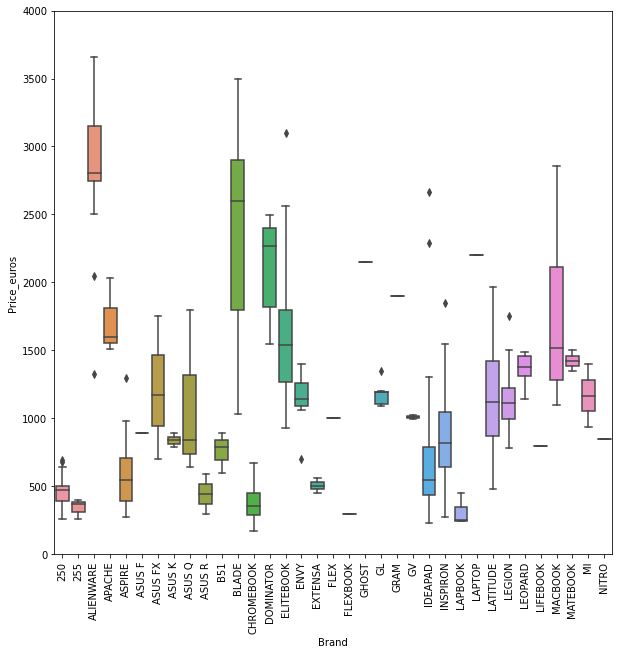

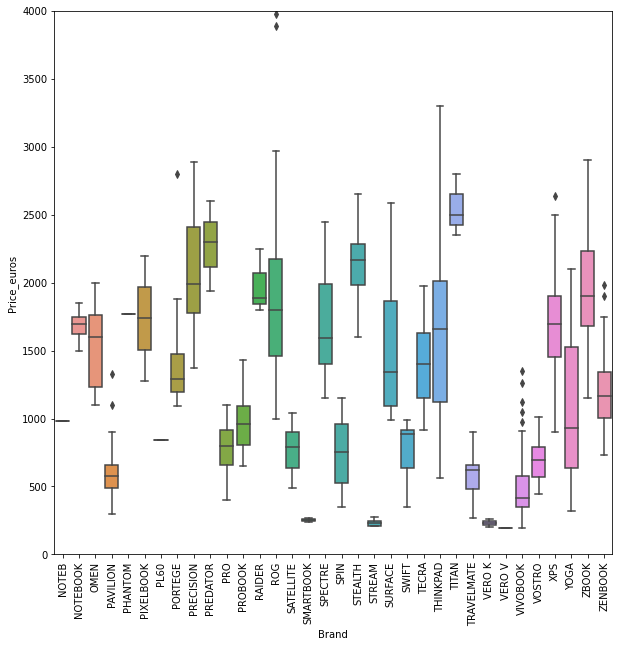

In [224]:
for i in list(range(0, 69, 35)):
    f, ax = plt.subplots(figsize=(10, 10))
    fig = sns.boxplot(x='Brand', 
                      y='Price_euros', 
                      data=train, 
                      order=brands_train[i:(i+35)])
    plt.xticks(rotation=90)
    plt.ylim(0, 4000)


We will check the number of null values for each variable 
in the training and test sets.

In [225]:
train.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight (kg)         0
Price_euros         0
Brand               0
dtype: int64

In [226]:
test.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight (kg)         0
Price_euros         0
Brand               0
dtype: int64

There are no null values in the training and test sets.

## Screen Resolution

Next, we will look closer at the ScreenResolution variable.

Note that the actual resolution of each laptop is 
just the last 9 characters of the string value of 
the ScreenResolution variable (width x height).  
We will create a new variable called Resolution 
which is just the actual resolution.

In [227]:
train['Resolution'] = train['ScreenResolution'].str[-9:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
test['Resolution'] = test['ScreenResolution'].str[-9:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We will look at the new categorical variable Resolution in more detail.  
We will look at descriptive statistics first.


In [229]:
train['Resolution'].describe()

count          1040
unique           16
top       1920x1080
freq            672
Name: Resolution, dtype: object

In [230]:
test['Resolution'].describe()

count           261
unique           12
top       1920x1080
freq            168
Name: Resolution, dtype: object

Next, we will use the value_counts method to get more 
information. 

In [231]:
train['Resolution'].value_counts()

1920x1080    672
1366x768     227
3840x2160     32
 1366x768     22
1600x900      21
3200x1800     18
2560x1440     18
2256x1504      5
1920x1200      5
2304x1440      4
2560x1600      4
2880x1800      4
2400x1600      3
2160x1440      2
1440x900       2
2736x1824      1
Name: Resolution, dtype: int64

In [232]:
test['Resolution'].value_counts()

1920x1080    168
1366x768      54
3840x2160     10
3200x1800      9
2560x1440      5
 1366x768      5
2304x1440      2
1600x900       2
2560x1600      2
1440x900       2
2400x1600      1
2256x1504      1
Name: Resolution, dtype: int64

Next, we will use the groupby and describe methods together to get 
descriptive statistics about the price for each category of the 
categorical variable in the training set.

Since there are 69 values for the Brand variable,
we will look at 35 categories at a time.

In [233]:
train.groupby('Resolution')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Resolution,,,,,,,,
1366x768,22.0,565.766818,201.028193,275.00,446.5025,537.235,667.3500,1099.00
1366x768,227.0,548.433524,289.756239,174.00,349.0000,459.000,695.0700,1895.00
1440x900,2.0,1128.850000,42.214275,1099.00,1113.9250,1128.850,1143.7750,1158.70
1600x900,21.0,682.240000,305.734954,379.00,530.0000,598.000,698.0000,1860.99
1920x1080,672.0,1191.581518,592.415491,196.00,779.0000,1075.500,1499.0000,3975.00
1920x1200,5.0,451.654000,158.537247,265.00,319.0000,479.000,549.0000,646.27
2160x1440,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.000,1461.5000,1499.00
2256x1504,5.0,1574.970000,661.206117,989.00,1089.0000,1340.000,1867.8500,2589.00
2304x1440,4.0,1313.000000,144.492214,1163.00,1250.0000,1289.500,1352.5000,1510.00


Next, we will check that the set of values 
in the test set is a subset of or equal to 
the set of values in the training set.

Note that for the Resolution variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 16 unique values in the 
training set and 12 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [234]:
set(test['Resolution']) <= set(train['Resolution'])

True

This means that for the Brand variable, there are values in the test set 
that are not in the training set.